In [3]:
### load arrs, pgv4 new

import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np

np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/large_outputs/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

def freeze_array(BA, P):
    P2 = np.zeros_like(P)
    P2[:, 0] = P[:, 0]
    for t in range(1, P.shape[1]):
        if BA[t] == 0:
            P2[:, t] = P[:, t]  # Update to current value in P
        else:
            P2[:, t] = P2[:, t - 1]  # Hold previous value
    return P2

def compare_arrays(pos_arr, pos_plan_arr):
    return np.where(pos_arr == pos_plan_arr, 0, 1)

file_ = 'outer_loop_pg_new_v4f_12_11-152204.pkl' # 'outer_loop_pg_new_v4f_29_10-092657.pkl' # 'outer_loop_pg_new_v4f_23_10-231650.pkl'
selected_other,plan_info = load_large_outputs(file_)
other = selected_other
((r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr),params) = selected_other

# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr,params) = other
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr) = other
print('r_arr.shape=',r_arr.shape,'rp_arr.shape=',rp_arr.shape,'sample_arr.shape=',sample_arr.shape,'mask_arr.shape=',mask_arr.shape,'\n','pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'policy_arr.shape=',policy_arr[0].shape,'\n','hs_arr=',hs_arr.shape,'hv_arr=',hv_arr.shape)
print('r_tot=',np.mean(np.sum(r_arr,axis=1)))

r_arr.shape= (1000, 60) rp_arr.shape= (1000, 60) sample_arr.shape= (1000, 60) mask_arr.shape= (1000, 60) 
 pos_plan_arr.shape= (1000, 61, 2) pos_arr.shape= (1000, 61, 2) dot_arr.shape= (1000, 61, 2) policy_arr.shape= (1000, 60, 81) 
 hs_arr= (1000, 60, 100) hv_arr= (1000, 60, 300)
r_tot= 10.036531


In [68]:
### load arrs, pgv2/3/4

import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np

np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_data(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

def freeze_array(BA, P):
    P2 = np.zeros_like(P)
    P2[:, 0] = P[:, 0]
    for t in range(1, P.shape[1]):
        if BA[t] == 0:
            P2[:, t] = P[:, t]  # Update to current value in P
        else:
            P2[:, t] = P2[:, t - 1]  # Hold previous value
    return P2

def compare_arrays(pos_arr, pos_plan_arr):
    return np.where(pos_arr == pos_plan_arr, 0, 1)

file_ =  'outer_loop_pg_new_v4f_17_10-182641.pkl' # 'outer_loop_pg_new_v4f_20_10-124641.pkl' # outer_loop_pg_new_v4f_17_10-182641.pkl' 
# 'outer_loop_pg_new_v4f_15_10-204705.pkl' #'outer_loop_pg_new_v4f_15_10-112328.pkl' #'outer_loop_pg_new_v4f_13_10-084101.pkl' # 'outer_loop_pg_new_v4f_14_10-015536.pkl' # 'outer_loop_pg_new_v4f_13_10-084101.pkl' # 'outer_loop_pg_new_v4f_12_10-173828.pkl' #'outer_loop_pg_new_v4f_13_10-081756.pkl' # 'outer_loop_pg_new_v4f_12_10-080400.pkl' # 'outer_loop_pg_new_v4f_12_10-175620.pkl' #'outer_loop_pg_new_v4f_12_10-173828.pkl' #'outer_loop_pg_new_v4f_12_10-151505.pkl' # 'outer_loop_pg_new_v4f_12_10-084905.pkl' # 'outer_loop_pg_new_v4f_12_10-080400.pkl' # 'outer_loop_pg_new_v4_26_09-022146.pkl' # 'outer_loop_pg_new_v4_24_09-201550.pkl' # 'outer_loop_pg_new_v4_18_09-093520.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'outer_loop_pg_new_v4_ppo_new__19_09-172733.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'sc_project/test_data/outer_loop_pg_new_v4_ppo_new__19_09-172733.pkl' # 'outer_loop_pg_new_v4_17_09-200259.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'outer_loop_pg_new_v3_c__15_09-203653.pkl'
other = load_data(file_)
# (r_arr,rt_arr,sample_arr,pos_plan_arr,pos_arr,dot_arr) = other # (r_arr,rt_arr,sample_arr,pos_plan_arr,pos_arr,dot_arr) (r_arr,rt_arr,pos_arr,dot_arr)
(r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr) = other
# print('r_arr.shape=',r_arr.shape,'rt_arr.shape=',rt_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'sample_arr.shape=',sample_arr.shape)
print('r_arr.shape=',r_arr.shape,'rp_arr.shape=',rp_arr.shape,'sample_arr.shape=',sample_arr.shape,'mask_arr.shape=',mask_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'policy_arr.shape=',policy_arr[0].shape)
print('r_tot=',np.mean(np.sum(r_arr,axis=1)))
print('mask_arr=',np.mean(mask_arr))

r_arr.shape= (1000, 60) rp_arr.shape= (1000, 60) sample_arr.shape= (1000, 60) mask_arr.shape= (1000, 60) pos_plan_arr.shape= (1000, 61, 2) pos_arr.shape= (1000, 61, 2) dot_arr.shape= (1000, 61, 2) policy_arr.shape= (1000, 60, 81)
r_tot= 4.654378
mask_arr= 0.21646667


In [4]:
# sort arrs, pgv1/2/3/4
tot_reward = jnp.sum(r_arr, axis=1)
r_tot_desc = jnp.argsort(tot_reward)[::-1]
r_tot_asc = jnp.argsort(tot_reward) #[::-1]
tot_plan = jnp.sum(sample_arr, axis=1)
plan_desc = jnp.argsort(tot_plan)[::-1]
# tot_loss_v = jnp.sum(loss_v_arr_, axis=1)
# loss_v_asc = jnp.argsort(tot_loss_v) #[::-1]
# loss_v_desc = jnp.argsort(tot_loss_v)[::-1]
# tot_loss_d = jnp.sum(loss_d_arr_, axis=1)
# loss_d_asc = jnp.argsort(tot_loss_d) #[::-1]
print('r_tot_desc=',r_tot_desc[:10])
print('r_tot_asc=',r_tot_asc[:10])
print('plan_desc=',plan_desc[:10])
# print('loss_v_asc=',loss_v_asc[:10])
# print('loss_v_desc=',loss_v_desc[:10])
# print('loss_d_asc=',loss_d_asc[:10])

r_tot_desc= [ 88 796 374 487 986 953 249 739 905 244]
r_tot_asc= [495 685 340 274 782  93  33 365 144 343]
plan_desc= [857 821 680 631 613 542 489 444 412 340]


In [5]:
# binned sort
%matplotlib inline

# Calculate dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=5)  # Assuming 4 bins
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Loop through speed bins
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_indices = np.where(mask)[0]  # Keep track of original indices
    masked_decisions = sample_arr[mask]
    masked_rewards = r_arr[mask]
    
    total_rewards = np.sum(masked_rewards, axis=1)
    planning_rates = np.mean(masked_decisions, axis=1)
    product_scores = total_rewards * planning_rates

    # Get the sorted indices in descending order
    reward_indices = np.argsort(total_rewards)[::-1]
    planning_indices = np.argsort(planning_rates)[::-1]
    product_indices = np.argsort(product_scores)[::-1]

    # Top 5 indices for rewards and planning rates
    top_reward_indices = reward_indices[:5]
    top_planning_indices = planning_indices[:50]
    top_product_indices = product_indices[:10]
    
    # Map back to original indices
    original_top_reward_indices = masked_indices[top_reward_indices]
    original_top_planning_indices = masked_indices[top_planning_indices]
    original_top_product_indices = masked_indices[top_product_indices]
    
    # Print the results
    print("top rewards for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_reward_indices):
        print(f" Index: {original_idx}, Reward: {total_rewards[top_reward_indices[idx]]:.2f}")

    print("\n top plan rates for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_planning_indices):
        print(f"Index: {original_idx}, Planning Rate: {planning_rates[top_planning_indices[idx]]:.2f}, reward: {np.sum(r_arr[original_idx,:]):.2f}")

    print("\n top Product Scores for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_product_indices):
        print(f"Index: {original_idx}, Score: {product_scores[top_product_indices[idx]]:.2f}")
    print('----------------------')

/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:3539: UserWarning: 'kind' argument to argsort is ignored; only 'stable' sorts are supported.
  warnings.warn("'kind' argument to argsort is ignored; only 'stable' sorts "


top rewards for speed bin 1
 Index: 88, Reward: 39.50
 Index: 796, Reward: 38.76
 Index: 374, Reward: 37.23
 Index: 487, Reward: 36.82
 Index: 986, Reward: 36.77

 top plan rates for speed bin 1
Index: 930, Planning Rate: 0.03, reward: 16.27
Index: 938, Planning Rate: 0.02, reward: 4.88
Index: 920, Planning Rate: 0.02, reward: 26.00
Index: 919, Planning Rate: 0.02, reward: 18.25
Index: 884, Planning Rate: 0.02, reward: 30.67
Index: 861, Planning Rate: 0.02, reward: 22.53
Index: 733, Planning Rate: 0.02, reward: 19.63
Index: 690, Planning Rate: 0.02, reward: 3.74
Index: 667, Planning Rate: 0.02, reward: 22.32
Index: 650, Planning Rate: 0.02, reward: 7.79
Index: 630, Planning Rate: 0.02, reward: 12.86
Index: 621, Planning Rate: 0.02, reward: 21.26
Index: 531, Planning Rate: 0.02, reward: 14.52
Index: 492, Planning Rate: 0.02, reward: 10.53
Index: 456, Planning Rate: 0.02, reward: 9.35
Index: 344, Planning Rate: 0.02, reward: 16.20
Index: 995, Planning Rate: 0.00, reward: 27.00
Index: 994

In [12]:
# egocentric ani pgv2/3 with policy heatmap

%matplotlib qt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors
from matplotlib.patches import Ellipse
import functools
import jax.numpy as jnp
import jax.random as rnd

def gen_sc(keys,MODULES,ACTION_SPACE,PLAN_SPACE):
    index_range = jnp.arange(MODULES**2)
    x = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
    y = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
    xv,yv = jnp.meshgrid(x,y)
    A_full = jnp.vstack([xv.flatten(),yv.flatten()])

    inner_mask = (jnp.abs(xv) <= ACTION_SPACE) & (jnp.abs(yv) <= ACTION_SPACE)
    A_inner_ind = index_range[inner_mask.flatten()]
    A_outer_ind = index_range[~inner_mask.flatten()]
    A_inner_perm = rnd.permutation(keys[0],A_inner_ind)
    A_outer_perm = rnd.permutation(keys[1],A_outer_ind)
    ID_ARR = jnp.concatenate((A_inner_perm,A_outer_perm),axis=0)

    VEC_ARR = A_full[:,ID_ARR]
    H1VEC_ARR = jnp.eye(MODULES**2) # [:,ID_ARR]
    SC = (ID_ARR,VEC_ARR,H1VEC_ARR)
    return SC #,prior_vec,zero_vec_index

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

def gen_vectors(m, A): # modules/neurons, aperture
    x = np.linspace(-(A-A/m), (A-A/m), m)
    x_ = np.tile(x, (m, ))
    y_ = np.repeat(np.flip(x), m)
    return np.vstack([x_, y_])

def circ_mean_var(v_pred,vec_range):
    v_clamped = np.clip(v_pred,0,None)
    x_y_coords = gen_vectors(np.int32(np.sqrt(len(v_clamped))),vec_range)
    x = x_y_coords[0,:]
    y = x_y_coords[1,:]
    z_x = v_pred*(np.cos(x) + 1j*np.sin(x))
    z_y = v_pred*(np.cos(y) + 1j*np.sin(y))
    mean_x = np.angle(np.sum(z_x)/np.sum(v_clamped))
    mean_y = np.angle(np.sum(z_y)/np.sum(v_clamped))
    circular_var_x = 1 - np.abs(np.sum(z_x) / np.sum(v_clamped))
    circular_var_y = 1 - np.abs(np.sum(z_y) / np.sum(v_clamped))
    circular_cov_matrix = np.diag([circular_var_x, circular_var_y])
    eigvals,eigvecs = np.linalg.eigh(circular_cov_matrix)
    sigma_x,sigma_y = np.sqrt(eigvals)  # no Scale factor for visualization
    return x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y

def set_axis_properties(ax,lim,labels,title=''):
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal', 'box')  
    ax.set_title(title)
    ticks = np.linspace(-lim,lim,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

def get_aperture_points(agent_t,aperture,density):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot,y_tot

def is_point_in_ellipse(x,y,h,k,a,b):
    ellipse_eq = ((x - h)**2)/(a ** 2) + ((y - k)**2)/(b**2)
    return ellipse_eq <= 1

def vonmises_fit(x_coords,y_coords,v_pred_vec):
    scalar = 100
    kappa_max = 2
    integer_weights = np.int32(np.round(v_pred_vec*scalar))
    x_samples = np.repeat(x_coords, integer_weights)
    y_samples = np.repeat(y_coords, integer_weights)
    kappa_x,loc_x,_ = scipy.stats.vonmises.fit(x_samples)
    kappa_y,loc_y,_ = scipy.stats.vonmises.fit(y_samples)
    kappa_x = np.min([kappa_x,kappa_max])
    kappa_y = np.min([kappa_y,kappa_max])
    log_numerator = kappa_x + kappa_y
    log_denominator = 2 * np.log(2*np.pi) + np.log(scipy.special.i0(kappa_x)) + np.log(scipy.special.i0(kappa_y))
    log_result = log_numerator - log_denominator
    mean_magnitude = np.exp(log_result)
    return kappa_x,loc_x,kappa_y,loc_y,mean_magnitude

def animate(i,r_arr,dot_rel,pos_plan_rel,pos_rel,policy_vec_rel,policy_arr_vec,policy_arr_act,VEC_ARR,dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,policy_scatter,L):
    
    dot.set_data(dot_rel[i, 0], dot_rel[i, 1])
    agent_plan.set_data(pos_plan_rel[i, 0], pos_plan_rel[i, 1])
    agent.set_data(pos_rel[i, 0], pos_rel[i, 1])
    # dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
    # agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
    # agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))

    if i == 0:
        aperture_points.set_color('green')
    else:
        aperture_points.set_color('lightgrey')

    lab = f'Frame={i}, Reward={r_arr[i]:.3f}' #, k={kappa_x:.3f},{kappa_y:.3f}'
    L.get_texts()[0].set_text(lab)

    policy_dot_sizes = np.sqrt(policy_arr_vec[i,:])
    policy_color = cm.hot(colormap_norm(policy_arr_act[i,0]))

    x_aperture_plan,y_aperture_plan = get_aperture_points(pos_plan_rel[i],APERTURE,DENSITY_DEFAULT)
    aperture_points_plan.set_offsets(np.c_[mod_(x_aperture_plan), mod_(y_aperture_plan)])
    x_aperture,y_aperture = get_aperture_points(pos_rel[i],APERTURE,DENSITY_DEFAULT)
    aperture_points.set_offsets(np.c_[mod_(x_aperture), mod_(y_aperture)])
    x_act_space_plan,y_act_space_plan = get_aperture_points(pos_plan_rel[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points_plan.set_offsets(np.c_[mod_(x_act_space_plan), mod_(y_act_space_plan)])
    x_act_space,y_act_space = get_aperture_points(pos_rel[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points.set_offsets(np.c_[mod_(x_act_space), mod_(y_act_space)])

    policy_scatter.set_offsets(policy_vec_rel[i,:,:])
    policy_scatter.set_sizes(POLICY_DOT_SIZE*policy_dot_sizes)
    policy_scatter.set_facecolors(policy_color)
    
    return [dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,policy_scatter,L]

k = 10
interval = 150
APERTURE = (1/2)*np.pi # (3/5)*np.pi # (1/2)*np.pi # (np.sqrt(2)/2)*np.pi # np.pi/2
ACTION_FRAC = 1 # 1/2
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 1 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2
STEPS = pos_arr.shape[0]
MODULES = 9 #
SIGMA_SCALE = 3
POLICY_DOT_SIZE = 100

ke = rnd.split(rnd.PRNGKey(0),10)
(ID_ARR,VEC_ARR,H1VEC_ARR) = gen_sc(ke,MODULES,ACTION_SPACE,PLAN_SPACE)

DENSITY_DEFAULT = 1000
DENSITY_ACT_PLAN = 15 # 10

r_arr_ = r_arr[k,:]
dot_arr_ = dot_arr[k,:,:] # [STEPS,2]
pos_plan_arr_ = pos_plan_arr[k,:,:] # [STEPS,2]
pos_arr_ = pos_arr[k,:,:] # [STEPS,2]
policy_arr_vec = policy_arr[0][k,:,:]
policy_arr_act = policy_arr[1][k,:,:]

pos_plan_rel = mod_(pos_plan_arr_-pos_arr_)
pos_rel = mod_(pos_arr_-pos_arr_)
dot_rel = mod_(dot_arr_-pos_arr_)
policy_vec_zeros = np.zeros((dot_arr.shape[1],MODULES**2,2))
policy_vec_zeros += (pos_plan_arr_[:,np.newaxis,:] - pos_arr_[:,np.newaxis,:] + VEC_ARR.T[np.newaxis,:,:])
policy_vec_rel = mod_(policy_vec_zeros)
print('policy_vec_rel.shape=',policy_vec_rel.shape)

fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
colormap_norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

ax_ani = plt.subplot(gs[0:2, 0:2],aspect='equal')
set_axis_properties(ax_ani,jnp.pi,["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
agent_plan, = ax_ani.plot(pos_plan_rel[0, 0], pos_plan_rel[0, 1], color='lightgrey', marker='+', markersize=12) #, label='agent')
agent, = ax_ani.plot(pos_rel[0, 0], pos_rel[0, 1], 'k+', markersize=12) #, label='agent')
dot, = ax_ani.plot(dot_rel[0, 0], dot_rel[0, 1], 'rx', markersize=10) #, label='dot')
text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')
# agent_plan, = ax_ani.plot(mod_(pos_plan_arr_[0, 0]), mod_(pos_plan_arr_[0, 1]), color='lightgrey', marker='+', markersize=12) #, label='agent')
# agent, = ax_ani.plot(mod_(pos_arr_[0, 0]), mod_(pos_arr_[0, 1]), 'k+', markersize=12) #, label='agent')
# dot, = ax_ani.plot(mod_(dot_arr_[0, 0]), mod_(dot_arr_[0, 1]), 'rx', markersize=10) #, label='dot')
# text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')

aperture_points = ax_ani.scatter([], [], color='lightgrey', s=1)
aperture_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)

policy_color_init = cm.hot(colormap_norm(policy_arr_act[0, 0])) # Assuming policy_arr_ corresponds to policy[1]
policy_dot_sizes_init = np.sqrt(policy_arr_vec[0, :])
policy_scatter = ax_ani.scatter(policy_vec_rel[0, :, 0], policy_vec_rel[0, :, 1], s=POLICY_DOT_SIZE*policy_dot_sizes_init, alpha=1, c=policy_color_init)

L=ax_ani.legend(loc='upper right')

partial_animate = functools.partial(
    animate,
    r_arr=r_arr_,
    dot_rel=dot_rel, 
    pos_plan_rel=pos_plan_rel,
    pos_rel=pos_rel, 
    policy_vec_rel=policy_vec_rel,
    policy_arr_vec=policy_arr_vec,
    policy_arr_act=policy_arr_act,
    VEC_ARR=VEC_ARR,
    dot=dot, 
    agent_plan=agent_plan,
    agent=agent, 
    aperture_points_plan=aperture_points_plan,
    aperture_points=aperture_points,
    act_space_points_plan=act_space_points_plan,
    act_space_points=act_space_points,
    policy_scatter=policy_scatter,
    L=L,
    )

ani = animation.FuncAnimation(
    fig=fig, 
    func=partial_animate,
    frames=STEPS, 
    blit=True, 
    interval=interval
    )

plt.tight_layout()
plt.show()

policy_vec_rel.shape= (61, 81, 2)


/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_24310/2920880609.py:192: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  policy_scatter = ax_ani.scatter(policy_vec_rel[0, :, 0], policy_vec_rel[0, :, 1], s=POLICY_DOT_SIZE*policy_dot_sizes_init, alpha=1, c=policy_color_init)
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_24310/2920880609.py:104: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(dot_rel[i, 0], dot_rel[i, 1])
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_24310/2920880609.py:105: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated 

In [17]:
# full ani pgv2/3 with policy heatmap

%matplotlib qt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors
from matplotlib.patches import Ellipse
import functools
import jax.numpy as jnp
import jax.random as rnd

def gen_sc(keys,MODULES,ACTION_SPACE,PLAN_SPACE):
    index_range = jnp.arange(MODULES**2)
    x = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
    y = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
    xv,yv = jnp.meshgrid(x,y)
    A_full = jnp.vstack([xv.flatten(),yv.flatten()])

    inner_mask = (jnp.abs(xv) <= ACTION_SPACE) & (jnp.abs(yv) <= ACTION_SPACE)
    A_inner_ind = index_range[inner_mask.flatten()]
    A_outer_ind = index_range[~inner_mask.flatten()]
    A_inner_perm = rnd.permutation(keys[0],A_inner_ind)
    A_outer_perm = rnd.permutation(keys[1],A_outer_ind)
    ID_ARR = jnp.concatenate((A_inner_perm,A_outer_perm),axis=0)

    VEC_ARR = A_full[:,ID_ARR]
    H1VEC_ARR = jnp.eye(MODULES**2) # [:,ID_ARR]
    SC = (ID_ARR,VEC_ARR,H1VEC_ARR)
    return SC #,prior_vec,zero_vec_index

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

def gen_vectors(m, A): # modules/neurons, aperture
    x = np.linspace(-(A-A/m), (A-A/m), m)
    x_ = np.tile(x, (m, ))
    y_ = np.repeat(np.flip(x), m)
    return np.vstack([x_, y_])

def circ_mean_var(v_pred,vec_range):
    v_clamped = np.clip(v_pred,0,None)
    x_y_coords = gen_vectors(np.int32(np.sqrt(len(v_clamped))),vec_range)
    x = x_y_coords[0,:]
    y = x_y_coords[1,:]
    z_x = v_pred*(np.cos(x) + 1j*np.sin(x))
    z_y = v_pred*(np.cos(y) + 1j*np.sin(y))
    mean_x = np.angle(np.sum(z_x)/np.sum(v_clamped))
    mean_y = np.angle(np.sum(z_y)/np.sum(v_clamped))
    circular_var_x = 1 - np.abs(np.sum(z_x) / np.sum(v_clamped))
    circular_var_y = 1 - np.abs(np.sum(z_y) / np.sum(v_clamped))
    circular_cov_matrix = np.diag([circular_var_x, circular_var_y])
    eigvals,eigvecs = np.linalg.eigh(circular_cov_matrix)
    sigma_x,sigma_y = np.sqrt(eigvals)  # no Scale factor for visualization
    return x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y

def set_axis_properties(ax,lim,labels,title=''):
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal', 'box')  
    ax.set_title(title)
    ticks = np.linspace(-lim,lim,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

def get_aperture_points(agent_t,aperture,density):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot,y_tot

def is_point_in_ellipse(x,y,h,k,a,b):
    ellipse_eq = ((x - h)**2)/(a ** 2) + ((y - k)**2)/(b**2)
    return ellipse_eq <= 1

def vonmises_fit(x_coords,y_coords,v_pred_vec):
    scalar = 100
    kappa_max = 2
    integer_weights = np.int32(np.round(v_pred_vec*scalar))
    x_samples = np.repeat(x_coords, integer_weights)
    y_samples = np.repeat(y_coords, integer_weights)
    kappa_x,loc_x,_ = scipy.stats.vonmises.fit(x_samples)
    kappa_y,loc_y,_ = scipy.stats.vonmises.fit(y_samples)
    kappa_x = np.min([kappa_x,kappa_max])
    kappa_y = np.min([kappa_y,kappa_max])
    log_numerator = kappa_x + kappa_y
    log_denominator = 2 * np.log(2*np.pi) + np.log(scipy.special.i0(kappa_x)) + np.log(scipy.special.i0(kappa_y))
    log_result = log_numerator - log_denominator
    mean_magnitude = np.exp(log_result)
    return kappa_x,loc_x,kappa_y,loc_y,mean_magnitude

def animate(i,r_arr,dot_arr,pos_plan_arr,pos_arr,policy_arr_vec,policy_arr_act,VEC_ARR,dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,policy_scatter,L):
    
    dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
    agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
    agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))

    if i == 0:
        aperture_points.set_color('green')
    else:
        aperture_points.set_color('lightgrey')

    lab = f'Frame={i}, Reward={r_arr[i]:.3f}' #, k={kappa_x:.3f},{kappa_y:.3f}'
    L.get_texts()[0].set_text(lab)

    policy_dot_sizes = np.sqrt(policy_arr_vec[i,:])
    policy_color = cm.hot(colormap_norm(policy_arr_act[i,0]))

    x_aperture_plan,y_aperture_plan = get_aperture_points(pos_plan_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points_plan.set_offsets(np.c_[mod_(x_aperture_plan), mod_(y_aperture_plan)])
    x_aperture,y_aperture = get_aperture_points(pos_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points.set_offsets(np.c_[mod_(x_aperture), mod_(y_aperture)])
    x_act_space_plan,y_act_space_plan = get_aperture_points(pos_plan_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points_plan.set_offsets(np.c_[mod_(x_act_space_plan), mod_(y_act_space_plan)])
    x_act_space,y_act_space = get_aperture_points(pos_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points.set_offsets(np.c_[mod_(x_act_space), mod_(y_act_space)])

    policy_scatter.set_offsets(mod_(pos_plan_arr[i, :] + VEC_ARR.T))
    policy_scatter.set_sizes(POLICY_DOT_SIZE*policy_dot_sizes)
    policy_scatter.set_facecolors(policy_color)
    
    return [dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,policy_scatter,L]

k = 290 # 902
# 479 10
interval = 200 # 150
APERTURE = (1/2)*np.pi # (3/5``)*np.pi # (1/2)*np.pi # (np.sqrt(2)/2)*np.pi # np.pi/2
ACTION_FRAC = 1 # 1/2
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 1 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2
STEPS = pos_arr.shape[1]
MODULES = 9 #
SIGMA_SCALE = 3
POLICY_DOT_SIZE = 70 # 100

ke = rnd.split(rnd.PRNGKey(0),10)
(ID_ARR,VEC_ARR,H1VEC_ARR) = gen_sc(ke,MODULES,ACTION_SPACE,PLAN_SPACE)

DENSITY_DEFAULT = 1000
DENSITY_ACT_PLAN = 15 # 10

r_arr_ = r_arr[k,:]
dot_arr_ = dot_arr[k,:,:] # [STEPS,2]
pos_plan_arr_ = pos_plan_arr[k,:,:] # [STEPS,2]
pos_arr_ = pos_arr[k,:,:] # [STEPS,2]
policy_arr_vec = policy_arr[0][k,:,:]
policy_arr_act = policy_arr[1][k,:,:]

fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
colormap_norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

ax_ani = plt.subplot(gs[0:2, 0:2],aspect='equal')
set_axis_properties(ax_ani,jnp.pi,["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
agent_plan, = ax_ani.plot(mod_(pos_plan_arr_[0, 0]), mod_(pos_plan_arr_[0, 1]), color='lightgrey', marker='+', markersize=12) #, label='agent')
agent, = ax_ani.plot(mod_(pos_arr_[0, 0]), mod_(pos_arr_[0, 1]), 'k+', markersize=12) #, label='agent')
dot, = ax_ani.plot(mod_(dot_arr_[0, 0]), mod_(dot_arr_[0, 1]), 'rx', markersize=10) #, label='dot')
text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')

aperture_points = ax_ani.scatter([], [], color='lightgrey', s=1)
aperture_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)

policy_color_init = cm.hot(colormap_norm(policy_arr_act[0,0])) # Assuming policy_arr_ corresponds to policy[1]
policy_dot_sizes_init = np.sqrt(policy_arr_vec[0, :])
policy_scatter = ax_ani.scatter(VEC_ARR[0, :], VEC_ARR[1, :], s=POLICY_DOT_SIZE*policy_dot_sizes_init, alpha=1, c=policy_color_init)

L=ax_ani.legend(loc='upper right')

partial_animate = functools.partial(
    animate,
    r_arr=r_arr_,
    dot_arr=dot_arr_, 
    pos_plan_arr=pos_plan_arr_,
    pos_arr=pos_arr_, 
    policy_arr_vec=policy_arr_vec,
    policy_arr_act=policy_arr_act,
    VEC_ARR=VEC_ARR,
    dot=dot, 
    agent_plan=agent_plan,
    agent=agent, 
    aperture_points_plan=aperture_points_plan,
    aperture_points=aperture_points,
    act_space_points_plan=act_space_points_plan,
    act_space_points=act_space_points,
    policy_scatter=policy_scatter,
    L=L,
    )

ani = animation.FuncAnimation(
    fig=fig, 
    func=partial_animate,
    frames=STEPS, 
    blit=True, 
    interval=interval
    )

plt.tight_layout()
plt.show()

/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_1087/3969157637.py:178: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  policy_scatter = ax_ani.scatter(VEC_ARR[0, :], VEC_ARR[1, :], s=POLICY_DOT_SIZE*policy_dot_sizes_init, alpha=1, c=policy_color_init)
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_1087/3969157637.py:104: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_1087/3969157637.py:105: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 a

In [19]:
# full ani pgv2/3 wip (no policy heatmap)
%matplotlib qt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
import functools
from matplotlib.patches import Ellipse

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

def gen_vectors(m, A): # modules/neurons, aperture
    x = np.linspace(-(A-A/m), (A-A/m), m)
    x_ = np.tile(x, (m, ))
    y_ = np.repeat(np.flip(x), m)
    return np.vstack([x_, y_])

def circ_mean_var(v_pred,vec_range):
    v_clamped = np.clip(v_pred,0,None)
    # get x/y coords
    x_y_coords = gen_vectors(np.int32(np.sqrt(len(v_clamped))),vec_range)
    x = x_y_coords[0,:]
    y = x_y_coords[1,:]
    # weighted complex numbers
    z_x = v_pred*(np.cos(x) + 1j*np.sin(x))
    z_y = v_pred*(np.cos(y) + 1j*np.sin(y))
    # mean
    mean_x = np.angle(np.sum(z_x)/np.sum(v_clamped))
    mean_y = np.angle(np.sum(z_y)/np.sum(v_clamped))
    # weighted circular variance for each angle
    circular_var_x = 1 - np.abs(np.sum(z_x) / np.sum(v_clamped))
    circular_var_y = 1 - np.abs(np.sum(z_y) / np.sum(v_clamped))
    circular_cov_matrix = np.diag([circular_var_x, circular_var_y])
    eigvals,eigvecs = np.linalg.eigh(circular_cov_matrix)
    sigma_x,sigma_y = np.sqrt(eigvals)  # no Scale factor for visualization
    return x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y

def set_axis_properties(ax,lim,labels,title=''):
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal', 'box')  
    ax.set_title(title)
    ticks = np.linspace(-lim,lim,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

def get_aperture_points(agent_t,aperture,density):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot,y_tot

def is_point_in_ellipse(x,y,h,k,a,b):
    ellipse_eq = ((x - h)**2)/(a ** 2) + ((y - k)**2)/(b**2)
    return ellipse_eq <= 1

def vonmises_fit(x_coords,y_coords,v_pred_vec):
    # v_pred_vec = np.clip(v_pred_vec,0,None)
    # v_pred_norm = v_pred_vec/np.sum(v_pred_vec)
    scalar = 100
    kappa_max = 2
    integer_weights = np.int32(np.round(v_pred_vec*scalar))
    x_samples = np.repeat(x_coords, integer_weights)
    y_samples = np.repeat(y_coords, integer_weights)
    kappa_x,loc_x,_ = scipy.stats.vonmises.fit(x_samples)
    kappa_y,loc_y,_ = scipy.stats.vonmises.fit(y_samples)
    kappa_x = np.min([kappa_x,kappa_max])
    kappa_y = np.min([kappa_y,kappa_max])
    # mean_magnitude = (np.exp(kappa_x+kappa_y)/((2*np.pi)**2 * scipy.special.i0(kappa_x) * scipy.special.i0(kappa_y)))
    log_numerator = kappa_x + kappa_y
    log_denominator = 2 * np.log(2*np.pi) + np.log(scipy.special.i0(kappa_x)) + np.log(scipy.special.i0(kappa_y))
    log_result = log_numerator - log_denominator
    mean_magnitude = np.exp(log_result)
    return kappa_x,loc_x,kappa_y,loc_y,mean_magnitude

def animate(i,r_arr,dot_arr,pos_plan_arr,pos_arr,dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,L):
    dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
    agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
    agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))
    # dot_hat.set_data(mod_(dot_hat_arr[i, 0]), mod_(dot_hat_arr[i, 1]))

    if i == 0:
        aperture_points.set_color('green')
        # L.get_texts()[0].set_text(f'Frame={i}, Reward=')
    else:
        aperture_points.set_color('black')

    # x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y = circ_mean_var(v_pred_arr[i],np.pi)### think
    # # x_y_coords,x,y,mean_x_ap,mean_y_ap,sigma_x_ap,sigma_y_ap = circ_mean_var(v_pred_arr[i],np.pi)### think
    # ell_circular.set_center((mod_(mean_x+pos_plan_arr[i, 0]), mod_(mean_y+pos_plan_arr[i, 1])))
    # ell_circular.width = SIGMA_SCALE*sigma_x
    # ell_circular.height = SIGMA_SCALE*sigma_y
    # ell_circular_v_pred.set_center((mean_x, mean_y))
    # ell_circular_v_pred.width = SIGMA_SCALE*sigma_x
    # ell_circular_v_pred.height = SIGMA_SCALE*sigma_y
    # ell_circular_v_t.set_center((mean_x, mean_y))
    # ell_circular_v_t.width = SIGMA_SCALE*sigma_x
    # ell_circular_v_t.height = SIGMA_SCALE*sigma_y
    # if i>0:
    #     in_ell_array[i] = is_point_in_ellipse(mod_(mean_x+pos_plan_arr[i, 0]), mod_(mean_y+pos_plan_arr[i, 1]), mod_(dot_arr[i,0]), mod_(dot_arr[i,1]), SIGMA_SCALE*sigma_x, SIGMA_SCALE*sigma_y)
    #     kappa_x,loc_x,kappa_y,loc_y,mean_magnitude = vonmises_fit(x_y_coords[0,:],x_y_coords[1,:],v_pred_arr[i])
    lab = f'Frame={i}, Reward={r_arr[i]:.3f}' #, k={kappa_x:.3f},{kappa_y:.3f}'
    L.get_texts()[0].set_text(lab)

    # scatters_pred.set_offsets(neuron_locs.T)
    # scatters_pred.set_array(v_pred_arr[i])
    # scatters_pred.set_sizes(15 * np.sqrt(v_pred_arr[i])) # []
    # scatters_pred.set_facecolors('k')

    # scatters_t.set_offsets(neuron_locs.T)
    # scatters_t.set_array(v_t_arr[i])
    # scatters_t.set_sizes(15 * np.sqrt(v_t_arr[i])) # []
    # scatters_t.set_facecolors('k')
    x_aperture_plan,y_aperture_plan = get_aperture_points(pos_plan_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points_plan.set_offsets(np.c_[mod_(x_aperture_plan), mod_(y_aperture_plan)])
    x_aperture,y_aperture = get_aperture_points(pos_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points.set_offsets(np.c_[mod_(x_aperture), mod_(y_aperture)])
    # x_aperture_centre,y_aperture_centre = get_aperture_points(np.array([0,0]),APERTURE,DENSITY_DEFAULT)
    # aperture_points_v_pred.set_offsets(np.c_[mod_(x_aperture_centre), mod_(y_aperture_centre)])
    # aperture_points_v_t.set_offsets(np.c_[mod_(x_aperture_centre), mod_(y_aperture_centre)])
    x_act_space_plan,y_act_space_plan = get_aperture_points(pos_plan_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points_plan.set_offsets(np.c_[mod_(x_act_space_plan), mod_(y_act_space_plan)])
    x_act_space,y_act_space = get_aperture_points(pos_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points.set_offsets(np.c_[mod_(x_act_space), mod_(y_act_space)])

    # x_plan_space,y_plan_space = get_aperture_points(pos_arr[i],PLAN_SPACE,DENSITY_PLAN_SPACE)
    # plan_space_points.set_offsets(np.c_[mod_(x_plan_space), mod_(y_plan_space)])
    
    return [dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,L]

# 449 434 862
k = 128 # 239 # 744 ## 815 ## 273 # 103 # 273 # 743 # 959 # 0,202, 275
interval = 150
APERTURE = (1/2)*np.pi # (3/5)*np.pi # (1/2)*np.pi # (np.sqrt(2)/2)*np.pi # np.pi/2
ACTION_FRAC = 1 # 1/2
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 2 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2
STEPS = pos_arr.shape[1]
MODULES = 7 # 7 # 9 # 17 # 15
# NEURONS_DISP = np.int32(np.sqrt(v_pred_arr.shape[2])) ##14 # 16 # 15 # 15 # 12 # 6 # ''full'' np.int32(NEURONS_AP*(np.pi//APERTURE))
SIGMA_SCALE = 3

DENSITY_DEFAULT = 1000
DENSITY_ACT_PLAN = 15 # 10

# neuron_locs = gen_vectors(NEURONS_DISP,jnp.pi) # NEURONS
# v_pred_arr_ = np.clip(v_pred_arr[k,:,:],0,1)
# v_t_arr_ = v_t_arr[k,:,:]
r_arr_ = r_arr[k,:]
dot_arr_ = dot_arr[k,:,:] # [STEPS,2]
pos_plan_arr_ = pos_plan_arr[k,:,:] # [STEPS,2]
pos_arr_ = pos_arr[k,:,:] # [STEPS,2]
# rel_vec_hat_arr_ = rel_vec_hat_arr[k,:,:] # [STEPS,2]
# dot_hat_arr_ = mod_(rel_vec_hat_arr_ + pos_arr_)

fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

ax_ani = plt.subplot(gs[0:2, 0:2],aspect='equal')
set_axis_properties(ax_ani,jnp.pi,["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
agent_plan, = ax_ani.plot(mod_(pos_plan_arr_[0, 0]), mod_(pos_plan_arr_[0, 1]), color='lightgrey', marker='+', markersize=12) #, label='agent')
agent, = ax_ani.plot(mod_(pos_arr_[0, 0]), mod_(pos_arr_[0, 1]), 'k+', markersize=12) #, label='agent')
dot, = ax_ani.plot(mod_(dot_arr_[0, 0]), mod_(dot_arr_[0, 1]), 'rx', markersize=10) #, label='dot')
text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')
# dot_hat, = ax_ani.plot(mod_(dot_hat_arr_[0, 0]), mod_(dot_hat_arr_[0, 1]), 'bx', markersize=10, label='dot_hat')

aperture_points = ax_ani.scatter([], [], color='black', s=1)
aperture_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points = ax_ani.scatter([], [], color='black', s=1)
act_space_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)
# plan_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)

# ell_circular = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ell_circular_patch = ax_ani.add_patch(ell_circular)
# text_ani = ax_ani.text(0.5, 0.8, '', transform=ax_ani.transAxes)
# ax_ani.legend(loc='upper left', bbox_to_anchor=(1, 1))
# ax_ani.legend(loc='upper right')
L=ax_ani.legend(loc='upper right')

# in_ell_array = np.zeros(STEPS,)

# ax_pred = plt.subplot(gs[2, 0], aspect='equal')
# # update scatter
# scatters_pred = ax_pred.scatter(
#     neuron_locs[0, :], neuron_locs[1, :], 
#     c='k', # v_pred_arr_[0], 
#     s=15 * np.sqrt(v_pred_arr_[0]), 
#     marker='o',
#     vmin=0, vmax=1)
# aperture_points_v_pred = ax_pred.scatter([], [], color='black', s=0.5)
# ell_circular_v_pred = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ecp_v_pred = ax_pred.add_patch(ell_circular_v_pred)
# set_axis_properties(ax_pred, jnp.pi, ["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"], 'v_pred')

# ax_t = plt.subplot(gs[2, 1], aspect='equal')
# # update scatter
# scatters_t = ax_t.scatter(
#     neuron_locs[0, :], neuron_locs[1, :], 
#     c='k', # v_t_arr_[0], 
#     s=15 * np.sqrt(v_t_arr_[0]), 
#     marker='o',
#     vmin=0, vmax=1)  # Assuming activations range from 0 to 1
# aperture_points_v_t = ax_t.scatter([], [], color='black', s=0.5)
# ell_circular_v_t = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ecp_v_t = ax_t.add_patch(ell_circular_v_t)
# set_axis_properties(ax_t, jnp.pi, ["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"], 'v_t')

partial_animate = functools.partial(
    animate,
    # v_pred_arr=v_pred_arr_, 
    # v_t_arr=v_t_arr_, 
    r_arr=r_arr_,
    dot_arr=dot_arr_, 
    # dot_hat_arr=dot_hat_arr_,
    pos_plan_arr=pos_plan_arr_,
    pos_arr=pos_arr_, 
    dot=dot, 
    # dot_hat=dot_hat,
    agent_plan=agent_plan,
    agent=agent, 
    # neuron_locs=neuron_locs, 
    # scatters_pred=scatters_pred, 
    # scatters_t=scatters_t,
    aperture_points_plan=aperture_points_plan,
    aperture_points=aperture_points,
    # aperture_points_v_pred=aperture_points_v_pred,
    # aperture_points_v_t=aperture_points_v_t,
    act_space_points_plan=act_space_points_plan,
    act_space_points=act_space_points,
    # plan_space_points=plan_space_points,
    # ell_circular=ell_circular,
    # ell_circular_v_pred=ell_circular_v_pred,
    # ell_circular_v_t=ell_circular_v_t,
    # in_ell_array=in_ell_array,
    # text_ani=text_ani,
    # ax_ani=ax_ani,
    L=L,
    )

ani = animation.FuncAnimation(
    fig=fig, 
    func=partial_animate,
    frames=STEPS, 
    blit=True, 
    interval=interval
    )

plt.tight_layout()
plt.show()

# print('in_ell_array=',in_ell_array[1:])
# print(r'% in array = ',np.sum(in_ell_array[1:])/(STEPS-1))

/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_24310/354023418.py:86: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_24310/354023418.py:87: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_24310/354023418.py:88: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))


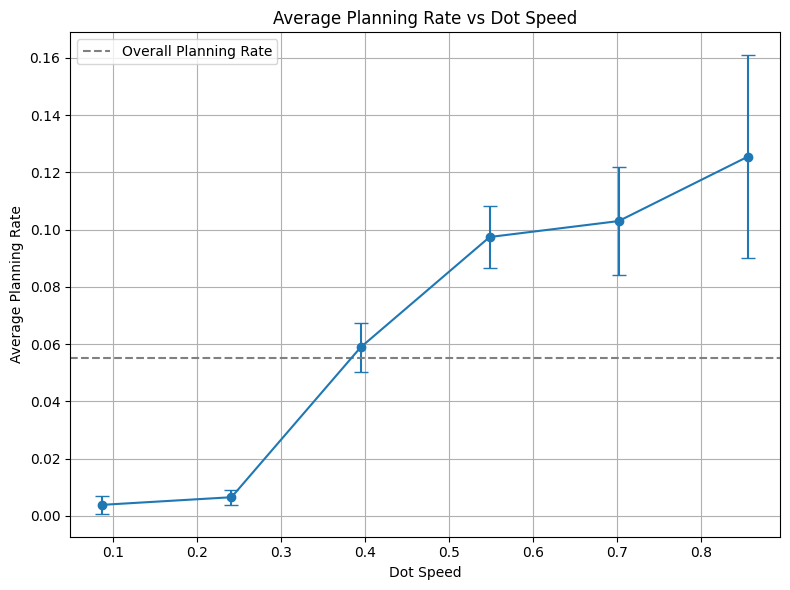

In [14]:
# avg planning rate (masked)

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sbins = 6

# Calculate dot speeds
dot_diffs = np.diff(dot_arr, axis=1)  # Shape: [1000, 120, 2]
dot_speeds = np.linalg.norm(dot_diffs, axis=2)  # Shape: [1000, 120]
mean_dot_speeds = np.mean(dot_speeds, axis=1)  # Shape: [1000]

# Calculate planning rates using the mask
masked_samples = np.where(mask_arr == 1, sample_arr, np.nan)  # Replace '0's in mask_arr with nan in sample_arr
planning_rates = np.nanmean(masked_samples, axis=1)  # Compute mean ignoring nan values

# Calculate overall planning rate for the dotted line
overall_rate = np.nanmean(masked_samples)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins +1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# For each speed bin, calculate mean and sem of planning rates
mean_rates = []
sem_rates = []

for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    rates_in_bin = planning_rates[mask]
    bin_size = np.sum(mask)
    mean_rates.append(np.nanmean(rates_in_bin))
    sem_rates.append(np.nanstd(rates_in_bin) / np.sqrt(bin_size))

# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(speed_bin_centers, mean_rates, yerr=1.96*np.array(sem_rates), fmt='o-', capsize=5)
plt.axhline(overall_rate, color='gray', linestyle='--', label="Overall Planning Rate")
plt.xlabel('Dot Speed')
plt.ylabel('Average Planning Rate')
plt.title('Average Planning Rate vs Dot Speed')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# shuffle plans
import numpy as np

# Sample data
sample_arr = np.random.randint(0, 2, (1000, 80))

def shuffle_plans(trial):
    # Number of plans in the trial
    num_plans = np.sum(trial)
    
    # Generate shuffled indices
    shuffled_indices = np.random.permutation(len(trial))
    
    # Create a new trial with moves (0s)
    new_trial = np.zeros_like(trial)
    
    # Place plans (1s) at the first 'num_plans' shuffled indices
    new_trial[shuffled_indices[:num_plans]] = 1
    return new_trial

sample_arr_shuffled = np.array([shuffle_plans(trial) for trial in sample_arr])


In [3]:
# gen_sc

def gen_sc(keys,MODULES,ACTION_SPACE,PLAN_SPACE):
    index_range = jnp.arange(MODULES**2)
    x = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
    y = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
    xv,yv = jnp.meshgrid(x,y)
    A_full = jnp.vstack([xv.flatten(),yv.flatten()])

    inner_mask = (jnp.abs(xv) <= ACTION_SPACE) & (jnp.abs(yv) <= ACTION_SPACE)
    A_inner_ind = index_range[inner_mask.flatten()]
    A_outer_ind = index_range[~inner_mask.flatten()]
    A_inner_perm = rnd.permutation(keys[0],A_inner_ind)
    A_outer_perm = rnd.permutation(keys[1],A_outer_ind)
    ID_ARR = jnp.concatenate((A_inner_perm,A_outer_perm),axis=0)

    VEC_ARR = A_full[:,ID_ARR]
    H1VEC_ARR = jnp.eye(MODULES**2) # [:,ID_ARR]
    SC = (ID_ARR,VEC_ARR,H1VEC_ARR)
    return SC #,prior_vec,zero_vec_index

ke = rnd.split(rnd.PRNGKey(0),10)
MODULES = 9
APERTURE = np.pi/2
ACTION_FRAC = 1 # 1/2
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 1 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2

(ID_ARR,VEC_ARR,H1VEC_ARR) = gen_sc(ke,MODULES,ACTION_SPACE,PLAN_SPACE)

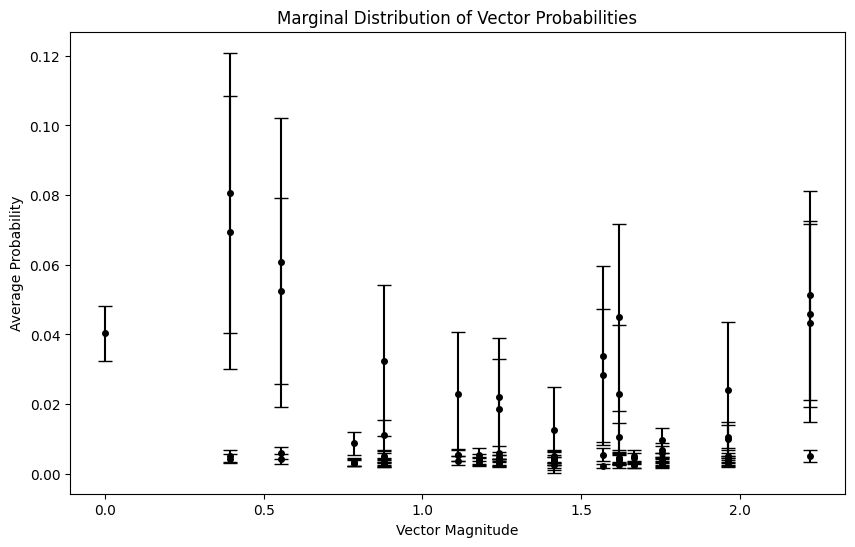

In [10]:
# marginal dist of all vectors

%matplotlib inline

policy_arr_ = np.array(policy_arr[0])
N = np.sqrt(policy_arr_.shape[0])

# Calculate the mean and standard error of the mean (SEM) for each vector over the 1000 instances.
mean_vec_probs = np.mean(np.mean(policy_arr_, axis=1), axis=0)  # shape (81, )
sem_vec_probs = np.std(np.mean(policy_arr_, axis=1), axis=0) / np.sqrt(N)  # shape (81, )

# Order the vectors by their magnitude
vec_magnitudes = np.linalg.norm(VEC_ARR, axis=0)  # shape (81, )
order_indices = np.argsort(vec_magnitudes)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    vec_magnitudes[order_indices], 
    mean_vec_probs[order_indices], 
    yerr=1.96 * sem_vec_probs[order_indices], 
    fmt='o', 
    markersize=4, 
    capsize=5,
    c='k'
)

ax.set_xlabel("Vector Magnitude")
ax.set_ylabel("Average Probability")
ax.set_title("Marginal Distribution of Vector Probabilities")
plt.show()


(81,)
(81,) (81,)


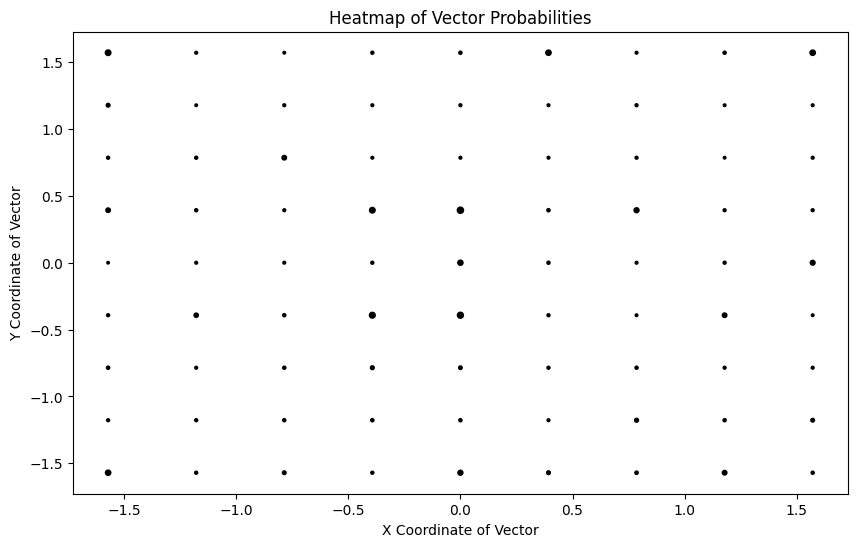

In [11]:
# marginal prob grid

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

DOT_SIZE = 5000

# Given policy_arr_ and VEC_ARR
policy_arr_ = np.array(policy_arr[0])

# Calculate the mean for each vector over the 1000 instances.
mean_vec_probs = np.mean(np.mean(policy_arr_, axis=1), axis=0)  # shape (81, )
print(mean_vec_probs.shape)

# x and y coordinates from VEC_ARR
x_coords, y_coords = VEC_ARR[0, :], VEC_ARR[1, :]
print(x_coords.shape,y_coords.shape)

# Use the marginal probability as size (scaled for better visualization)
sizes = DOT_SIZE * mean_vec_probs  # Scale by an appropriate factor for visualization

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x_coords, y_coords, s=np.sqrt(sizes), c='k', alpha=1)

# Colorbar to show the magnitude of the vector's probability
# cbar = fig.colorbar(scatter, ax=ax)
# cbar.set_label("Average Probability")
ax.set_xlabel("X Coordinate of Vector")
ax.set_ylabel("Y Coordinate of Vector")
ax.set_title("Heatmap of Vector Probabilities")

plt.show()


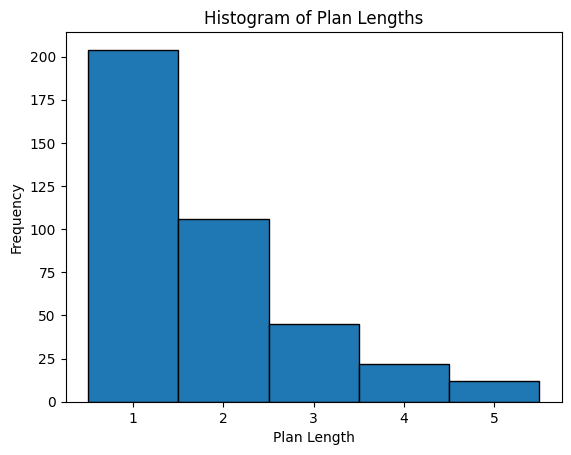

In [12]:
# marginal histogram of plan lengths

import numpy as np
import matplotlib.pyplot as plt

# Assuming sample_arr is a 2D array where each row represents a sequence, 
# and 1's in a sequence represent the plan

# Count the number of 1's in each sequence
plan_lengths = np.sum(sample_arr, axis=1)

# Plot the histogram
plt.hist(plan_lengths, bins=np.arange(1, plan_lengths.max()+2) - 0.5, edgecolor="k", align="mid")
plt.xlabel("Plan Length")
plt.ylabel("Frequency")
plt.title("Histogram of Plan Lengths")
plt.xticks(np.arange(1,plan_lengths.max()+1))
plt.show()


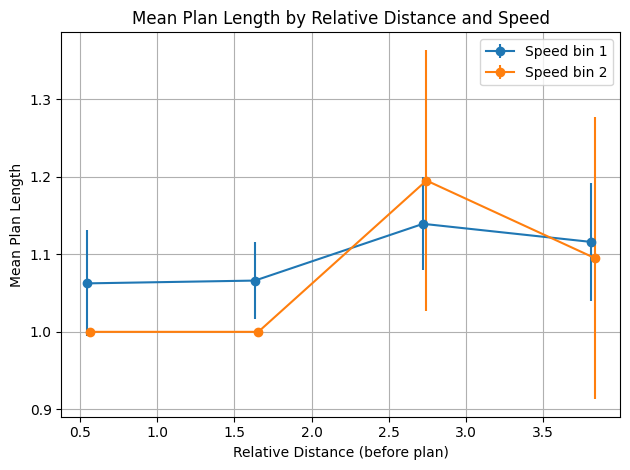

In [32]:
# plan lengths as a fnc of relative distance, binned by speed

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def calculate_relative_distance(a, b):
    d = np.pi - np.abs(np.pi - np.abs(a - b) % (2*np.pi))
    return np.linalg.norm(d)

# Compute mean dot speeds for each trial
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
trial_mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Extract plans, corresponding relative distances, and plan dot speeds
all_relative_distances = []
all_plan_lengths = []
all_plan_dot_speeds = []

# Iterate over each trial
for trial in range(dot_arr.shape[0]):
    changes = np.diff(np.concatenate([[0], sample_arr[trial], [0]]))
    starts = np.where(changes == 1)[0]
    ends = np.where(changes == -1)[0]
    
    for start, end in zip(starts, ends):
        # Calculate relative distance just before the plan starts
        relative_distance = calculate_relative_distance(dot_arr[trial, start-1], pos_plan_arr[trial, start-1])
        all_relative_distances.append(relative_distance)
        
        # Get plan length for the current plan
        plan_length = end - start
        all_plan_lengths.append(plan_length)
        
        # Append the mean dot speed for the current trial/plan
        all_plan_dot_speeds.append(trial_mean_dot_speeds[trial])

all_relative_distances = np.array(all_relative_distances)
all_plan_lengths = np.array(all_plan_lengths)
all_plan_dot_speeds = np.array(all_plan_dot_speeds)

# Bin data by relative distance
rbins = 4
sbins = 2
distance_bins = np.linspace(0, np.max(all_relative_distances), num=rbins + 1)
mean_lengths = np.zeros((rbins, sbins))
sem_lengths = np.zeros((rbins, sbins))

offset = 0.02 * (distance_bins[1] - distance_bins[0])  # offset based on the range of the x-axis

for r in range(rbins):
    for s in range(sbins):
        mask_distance = (all_relative_distances >= distance_bins[r]) & (all_relative_distances < distance_bins[r + 1])
        mask_speed = (all_plan_dot_speeds >= speed_bins[s]) & (all_plan_dot_speeds < speed_bins[s + 1])
        
        mask = mask_distance & mask_speed
        lengths_in_bin = all_plan_lengths[mask]
        
        if len(lengths_in_bin) > 0:
            mean_lengths[r, s] = np.mean(lengths_in_bin)
            sem_lengths[r, s] = np.std(lengths_in_bin) / np.sqrt(len(lengths_in_bin))

# Plotting
fig, ax = plt.subplots()
for s in range(sbins):
    x_values = (distance_bins[1:] + distance_bins[:-1]) / 2 + s * offset
    ax.errorbar(x_values, mean_lengths[:, s], yerr=1.96*sem_lengths[:, s], label=f"Speed bin {s+1}", fmt='o-')

ax.set_xlabel("Relative Distance (before plan)")
ax.set_ylabel("Mean Plan Length")
ax.set_title("Mean Plan Length by Relative Distance and Speed")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


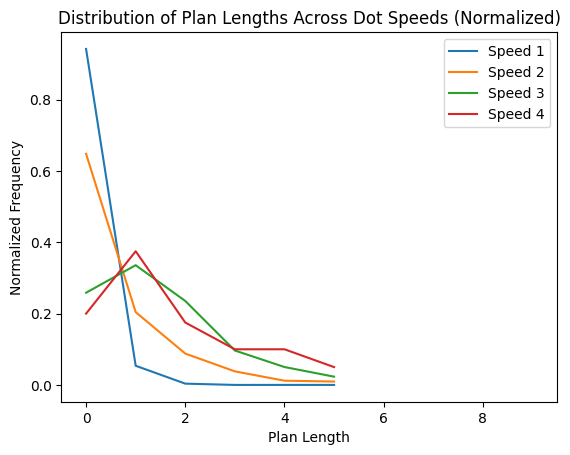

In [13]:
# plan length histogram binned by speed, normalized by number of plans

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

XCUTOFF = 9

# Compute mean dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Count the number of 1's in each sequence (plan lengths)
plan_lengths = np.sum(sample_arr, axis=1)

# Bin data based on dot speeds
sbins = 4
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)

# Initialize an array to store frequencies
max_plan_length = int(plan_lengths.max())
frequency_distribution = np.zeros((sbins, max_plan_length+1))

def compute_median_from_frequencies(freqs):
    cumulative = np.cumsum(freqs)
    total = cumulative[-1]
    
    # Find the index where the cumulative sum exceeds half of the total count
    median_idx = np.searchsorted(cumulative, total / 2)
    return median_idx

median_lengths = np.zeros(sbins)

# Bin the plan lengths based on dot speeds and count their occurrences
for i in range(sbins):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    bin_lengths = plan_lengths[mask]
    
    for length in bin_lengths:
        frequency_distribution[i, np.int32(length)] += 1

    # Normalize by the total number of plans in the bin
    frequency_distribution[i] /= len(bin_lengths)
    
    # Compute the median for plan length
    median_lengths[i] = compute_median_from_frequencies(frequency_distribution[i])

# Plot the line graph
fig, ax = plt.subplots()

for i in range(sbins):
    ax.plot(frequency_distribution[i][:XCUTOFF+1], label=f'Speed {i+1}')
    # ax.axvline(median_lengths[i], color=f"C{i}", linestyle="--")  # Vertical line for median

ax.set_xlim([-0.5, XCUTOFF+0.5])  # Set the x-axis limit
ax.set_xlabel("Plan Length")
ax.set_ylabel("Normalized Frequency")
ax.set_title("Distribution of Plan Lengths Across Dot Speeds (Normalized)")
ax.legend()

plt.show()



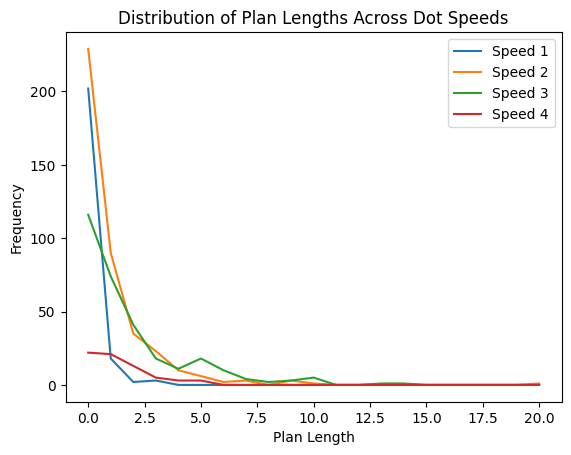

In [48]:
# plan length histogram binned by speed (OLD)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Compute mean dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Count the number of 1's in each sequence (plan lengths)
plan_lengths = np.sum(sample_arr, axis=1)

# Bin data based on dot speeds
sbins = 4
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)

# Initialize an array to store frequencies
max_plan_length = int(plan_lengths.max())
frequency_distribution = np.zeros((sbins, max_plan_length+1))

# Bin the plan lengths based on dot speeds and count their occurrences
for i in range(sbins):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    bin_lengths = plan_lengths[mask]
    
    for length in bin_lengths:
        frequency_distribution[i, np.int32(length)] += 1

# Plot the line graph
fig, ax = plt.subplots()

for i in range(sbins):
    ax.plot(frequency_distribution[i], label=f'Speed {i+1}')

ax.set_xlabel("Plan Length")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Plan Lengths Across Dot Speeds")
ax.legend()

plt.show()

# # Plot the line graph
# speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2
# for i, (freq, speed) in enumerate(zip(frequency_distribution, speed_bin_centers)):
#     plt.plot(np.arange(1, len(freq)+1), freq, label=f"Speed: {speed:.2f}-{speed_bins[i+1]:.2f}")

# plt.xlabel("Plan Length")
# plt.ylabel("Frequency")
# plt.title("Histogram of Plan Lengths across Dot Speeds")
# plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.show()


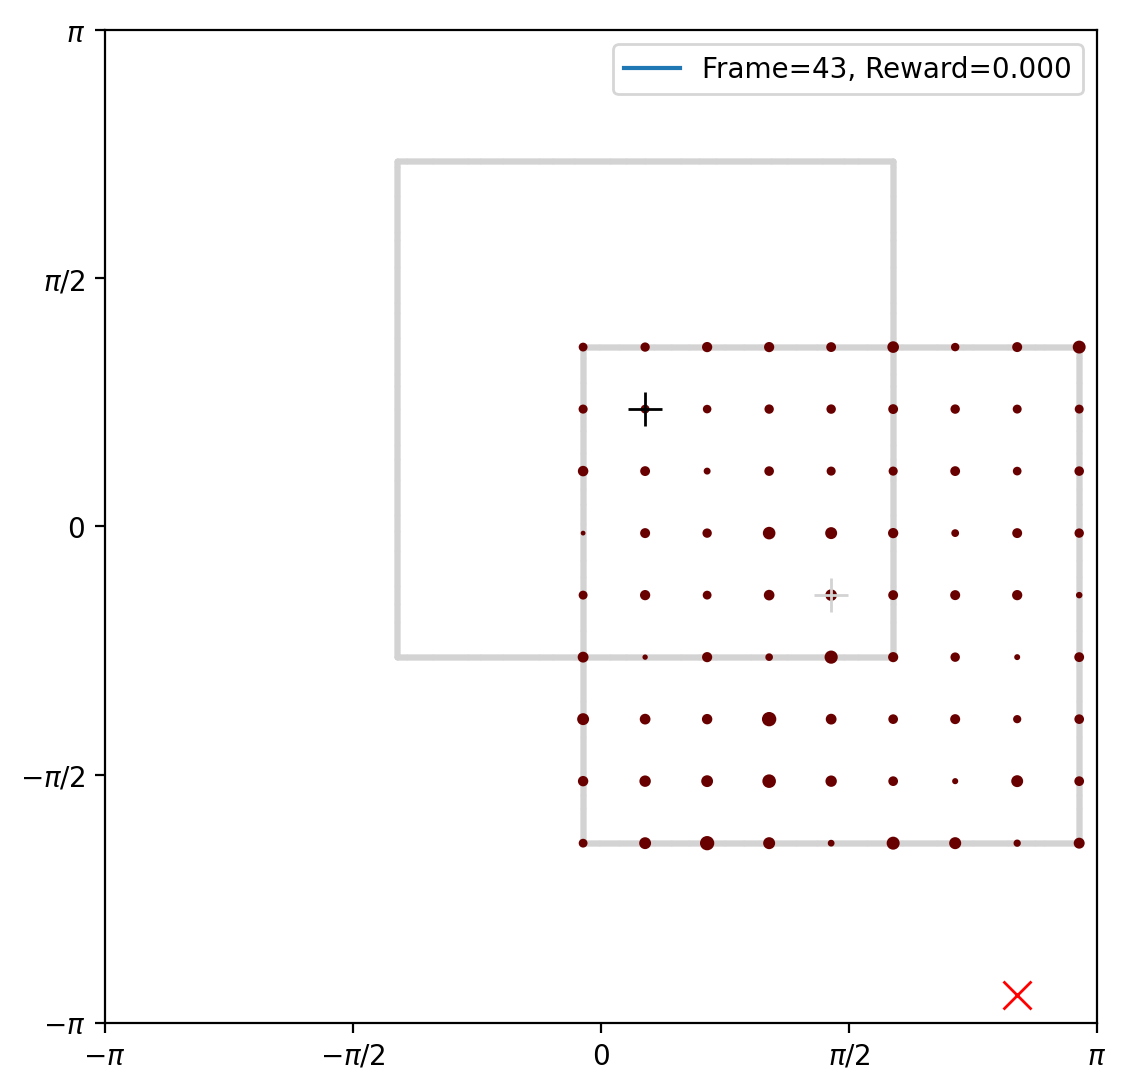

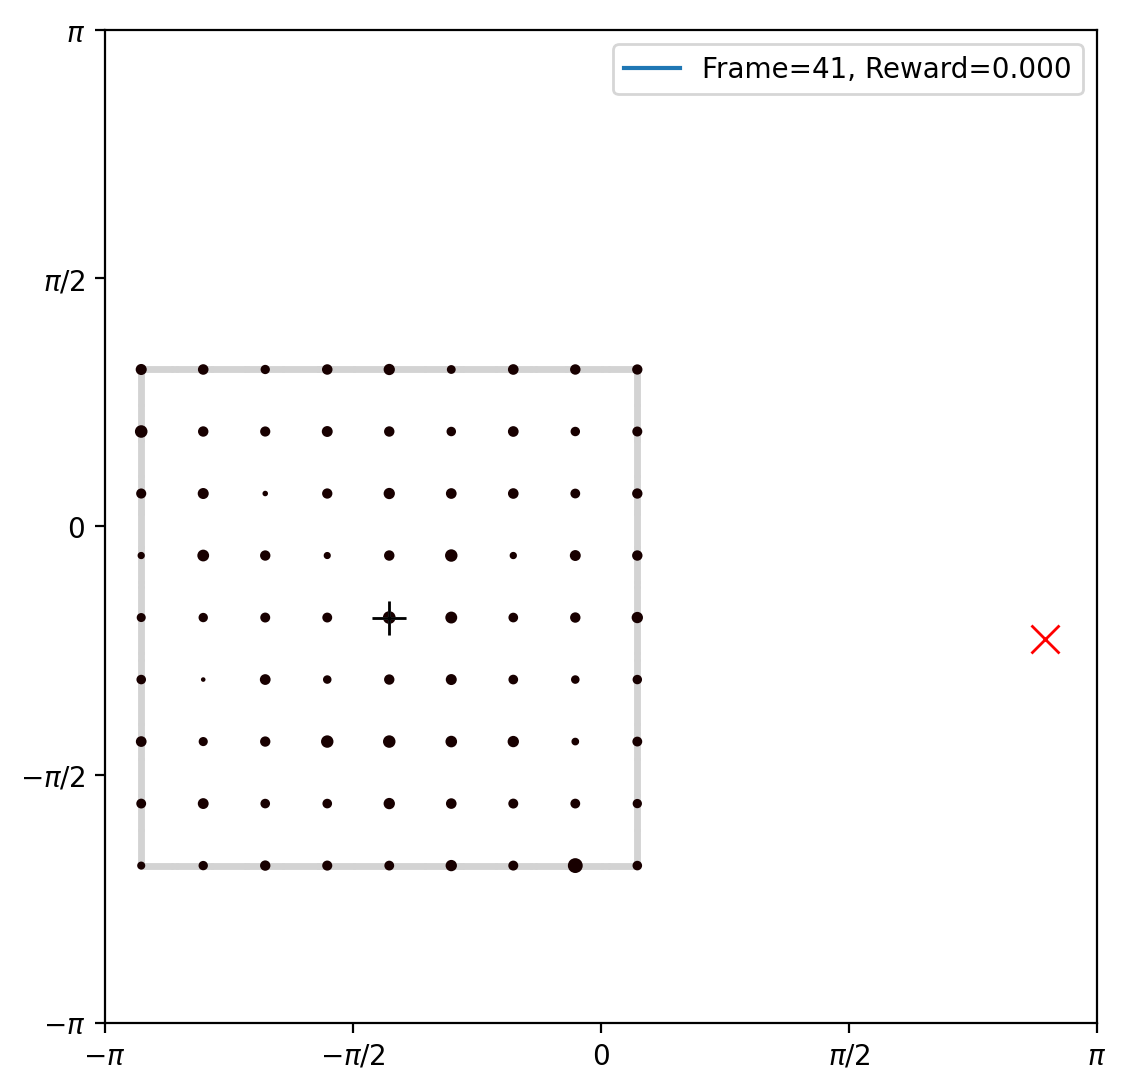

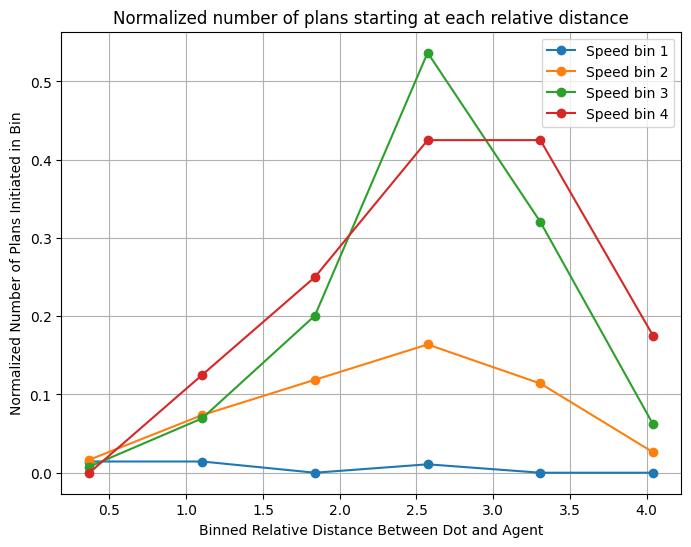

In [18]:
# plan length vs relative distance

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return np.mod(x + np.pi, 2*np.pi) - np.pi

def calculate_relative_distance(a, b):
    d = np.pi - np.abs(np.pi - np.abs(a - b) % (2*np.pi))
    return np.linalg.norm(d)


# dot_arr_mod = mod_(dot_arr)
# pos_arr_mod = mod_(pos_arr)
# pos_plan_arr_mod = mod_(pos_plan_arr)

sbins = 4
dbins = 6

# dot speed
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)

# range for relative distances
all_relative_distances = [calculate_relative_distance(dot[i-1], pos_plan[i-1]) for dot, pos_plan in zip(dot_arr, pos_plan_arr) for i in range(1, len(dot))]
distance_bins = np.linspace(min(all_relative_distances), max(all_relative_distances), dbins+1)

plt.figure(figsize=(8, 6))

# across speed bins, find relative distances and plot their frequencies
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    num_trials_in_bin = np.sum(mask)
    
    masked_samples = sample_arr[mask]
    masked_pos_plan = pos_plan_arr[mask]
    masked_dot = dot_arr[mask]
    
    distances = []
    
    for sample, pos_plan, dot in zip(masked_samples, masked_pos_plan, masked_dot):
        changes = np.diff(np.concatenate([[0], sample, [0]]))
        starts = np.where(changes == 1)[0]
        
        for start in starts:
            if start == 0:
                continue

            distance = calculate_relative_distance(dot[start-1], pos_plan[start-1])
            distances.append(distance)
    
    # bin the distances, count occurrences, normalize by number of trials
    binned_counts = []
    for bin_start, bin_end in zip(distance_bins[:-1], distance_bins[1:]):
        count_in_bin = sum(bin_start <= d < bin_end for d in distances)
        normalized_count = count_in_bin / num_trials_in_bin if num_trials_in_bin else 0
        binned_counts.append(((bin_start + bin_end) / 2, normalized_count))

    bin_centers, normalized_counts = zip(*binned_counts)
    plt.plot(bin_centers, normalized_counts, label=f"Speed bin {i+1}", marker='o')

plt.xlabel('Binned Relative Distance Between Dot and Agent')
plt.ylabel('Normalized Number of Plans Initiated in Bin')
plt.title('Normalized number of plans starting at each relative distance')
plt.legend()
plt.grid(True)
plt.show()


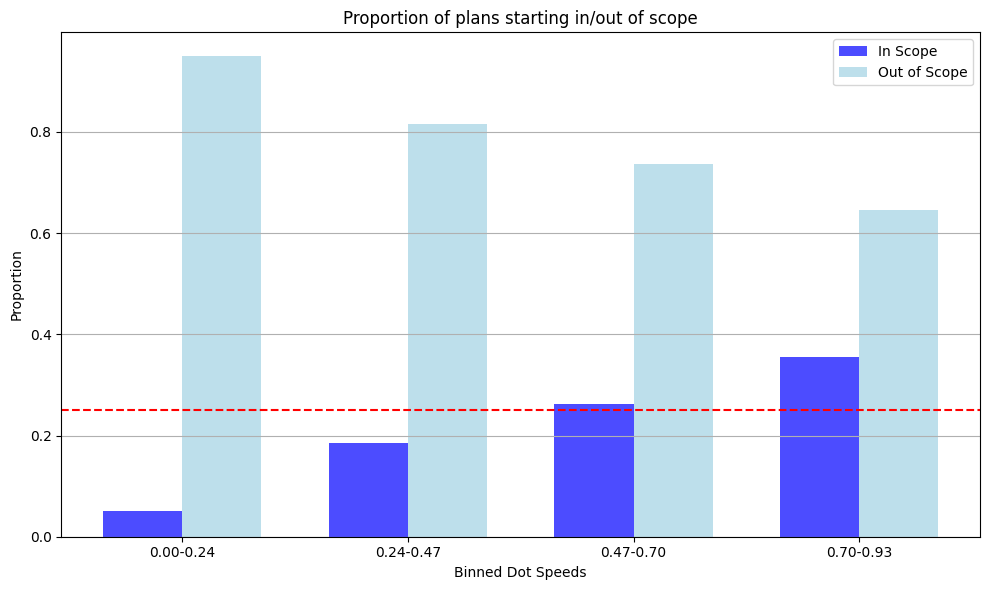

In [29]:
# prop of plans started with dot in scope/not in scope of aperture
# use mod?

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

APERTURE = np.pi/4

# Function to calculate the relative angle
def mod_(x):
    return np.mod(x + np.pi, 2*np.pi) - np.pi

# def calculate_relative_angle(a, b):
#     d = np.pi - np.abs(np.pi - np.abs(a - b) % (2*np.pi))
#     return np.linalg.norm(d)

def calculate_relative_angle(a, b):
    angle = np.abs(mod_(a - b))
    return angle

sbins = 4

# Calculate dot speed
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)

plt.figure(figsize=(10, 6))

# Data to store results for each speed bin
in_scope_proportions = []
out_scope_proportions = []

# For each speed bin, calculate the proportion of plans where dot is in scope
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_samples = sample_arr[mask]
    masked_pos_plan = mod_(pos_plan_arr[mask])
    masked_dot = mod_(dot_arr[mask])
    
    in_scope_count = 0
    
    for sample, pos_plan, dot in zip(masked_samples, masked_pos_plan, masked_dot):
        changes = np.diff(np.concatenate([[0], sample, [0]]))
        starts = np.where(changes == 1)[0]
        
        for start in starts:
            if start == 0:
                continue

            angles = calculate_relative_angle(dot[start-1], pos_plan[start-1])
            # Check if any component is within APERTURE
            if np.any(angles <= APERTURE):
                in_scope_count += 1

    total_plans = len(masked_samples)
    in_scope_proportions.append(in_scope_count / total_plans)
    out_scope_proportions.append(1 - (in_scope_count / total_plans))

# Plotting
bar_width = 0.35
index = np.arange(sbins)
bar1 = plt.bar(index, in_scope_proportions, bar_width, color='blue', alpha=0.7, label='In Scope')
bar2 = plt.bar(index + bar_width, out_scope_proportions, bar_width, color='lightblue', alpha=0.8, label='Out of Scope')

plt.xlabel('Binned Dot Speeds')
plt.ylabel('Proportion')
plt.title('Proportion of plans starting in/out of scope')
plt.xticks(index + bar_width/2, [f"{speed_bins[i]:.2f}-{speed_bins[i+1]:.2f}" for i in range(sbins)])
plt.legend()
plt.tight_layout()
plt.axhline(0.25, color="red", linestyle="--")
plt.grid(True, axis='y')

plt.show()


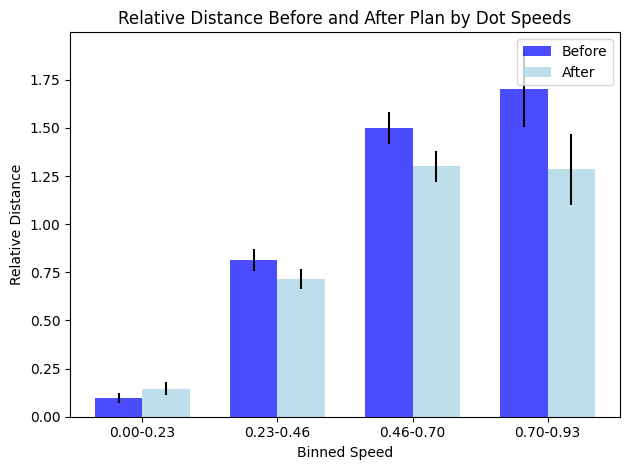

In [24]:
# relative distance before/after plan
# FIX - check correct

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# def calculate_relative_distance(a, b):
#     # Distance considering periodicity for each dimension
#     d = np.pi - np.abs(np.pi - np.abs(a - b) % (2*np.pi))
#     norm = np.linalg.norm(d)
#     if norm > np.sqrt(2)*np.pi:
#         print('norm=',norm,'a=',a,'b=',b)
#     # print('d=',d)
#     return 

def calculate_relative_distance(a, b):
    # Ensure a and b have the same number of dimensions
    assert len(a.shape) == len(b.shape), "Inputs should have the same number of dimensions"
    
    # If they are 1D, expand dimensions
    if len(a.shape) == 1:
        a = np.expand_dims(a, axis=0)
        b = np.expand_dims(b, axis=0)

    # Calculate the relative distance element-wise
    d = np.pi - np.abs(np.pi - np.abs(a - b) % (2*np.pi))
    return np.linalg.norm(d, axis=1)

# def calculate_relative_distance(a, b):
#     # Ensure a and b are 2D arrays
#     assert len(a.shape) == 2 and len(b.shape) == 2, "Inputs should be 2D arrays"
#     # Calculate the relative distance element-wise
#     d = np.pi - np.abs(np.pi - np.abs(a - b) % (2*np.pi))
#     # Take the norm along the last dimension
#     return np.linalg.norm(d, axis=-1)

# Sample data
N = len(dot_arr)
speed_bins = 4

# Compute mean dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Calculate the relative distances before and after the plan
before_distances = np.zeros(N)
after_distances = np.zeros(N)

for i in range(N):
    plan = sample_arr[i]
    changes = np.diff(np.concatenate([[0], plan, [0]]))
    
    start_changes = np.where(changes == 1)
    end_changes = np.where(changes == -1)

    if len(start_changes[0]) == 0 or len(end_changes[0]) == 0:
        # Skip this iteration if there's no start or end point in the plan
        continue

    start_idx = start_changes[0][0] - 1
    end_idx = end_changes[0][0]

    before_distances[i] = calculate_relative_distance(dot_arr[i, start_idx], pos_plan_arr[i, start_idx])
    after_distances[i] = calculate_relative_distance(dot_arr[i, end_idx], pos_plan_arr[i, end_idx])

# Bin data by speed
bins = np.linspace(0, np.max(mean_dot_speeds), speed_bins + 1)
binned_speed_indices = np.digitize(mean_dot_speeds, bins) - 1

avg_before = [np.mean(before_distances[binned_speed_indices == i]) for i in range(speed_bins)]
sem_before = [np.std(before_distances[binned_speed_indices == i]) / np.sqrt(sum(binned_speed_indices == i)) for i in range(speed_bins)]
avg_after = [np.mean(after_distances[binned_speed_indices == i]) for i in range(speed_bins)]
sem_after = [np.std(after_distances[binned_speed_indices == i]) / np.sqrt(sum(binned_speed_indices == i)) for i in range(speed_bins)]

# Plot
width = 0.35
labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(speed_bins)]
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_before, width, yerr=sem_before, label='Before', color='blue', alpha=0.7)
rects2 = ax.bar(x + width/2, avg_after, width, yerr=sem_after, label='After', color='lightblue', alpha=0.8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Distance')
ax.set_xlabel('Binned Speed')
ax.set_title('Relative Distance Before and After Plan by Dot Speeds')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


In [25]:
# reward vs speed for plan/no plan/shuffle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sbins = 4
N = dot.shape[0]

# dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

avg_rewards = []
sem_rewards = []

# loop through bins
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_rewards = r_arr[mask]
    total_rewards = np.sum(masked_rewards, axis=1)
    
    avg_reward = np.mean(total_rewards)
    avg_rewards.append(avg_reward)
    
    sem_reward = np.std(total_rewards)/np.sqrt(N)
    sem_rewards.append(sem_reward)

avg_plan_rewards = np.array(avg_rewards)
sem_plan_rewards = np.array(sem_rewards)

print('avg_plan_rewards=',avg_plan_rewards)
print('std_plan_rewards=',sem_plan_rewards)


avg_plan_rewards= [16.65973    4.822153   1.4600996  1.3042773]
std_plan_rewards= [0.7470385  0.6164937  0.14214721 0.10026482]


In [ ]:
# plot avg rewards across speed for plan / no plan / shuffled plans - line
plt.figure(figsize=(10, 6))
plt.errorbar(speed_bin_centers, avg_plan_rewards, yerr=1.96*sem_plan_rewards, fmt='o-', capsize=5, label='plan')
plt.errorbar(speed_bin_centers-0.01, avg_noplan_rewards, yerr=sem_noplan_rewards, fmt='o-', capsize=5, label='no plan')
plt.errorbar(speed_bin_centers+0.01, avg_shuffle_rewards, yerr=sem_shuffle_rewards, fmt='o-', capsize=5, label='shuffle')
plt.xlabel("Dot Speed")
plt.ylabel("Average Reward")
plt.title("Average Reward across Speed Bins with Standard Deviation")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# plot avg rewards across speed for plan / no plan / shuffled plans - bar

bar_width = 0.2
r1 = np.arange(len(speed_bin_centers))  # Position for first bars
r2 = [x + bar_width for x in r1]       # Position for second set of bars
r3 = [x + bar_width for x in r2]       # Position for third set of bars

plt.figure(figsize=(10, 6))

# Create bars with error bars
plt.bar(r1, avg_plan_rewards, width=bar_width, yerr=1.96*sem_plan_rewards, capsize=5, label='plan', color='blue', alpha=0.7)
plt.bar(r2, avg_noplan_rewards, width=bar_width, yerr=std_noplan_rewards, capsize=5, label='no plan', color='green', alpha=0.7)
plt.bar(r3, avg_shuffle_rewards, width=bar_width, yerr=std_shuffle_rewards, capsize=5, label='shuffle', color='red', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Dot Speed')
plt.ylabel('Average Reward')
plt.title('Average Reward across Speed Bins with Standard Deviation')
plt.xticks([r + bar_width for r in r1], speed_bin_centers)  # Set the x-ticks in the middle of grouped bars
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


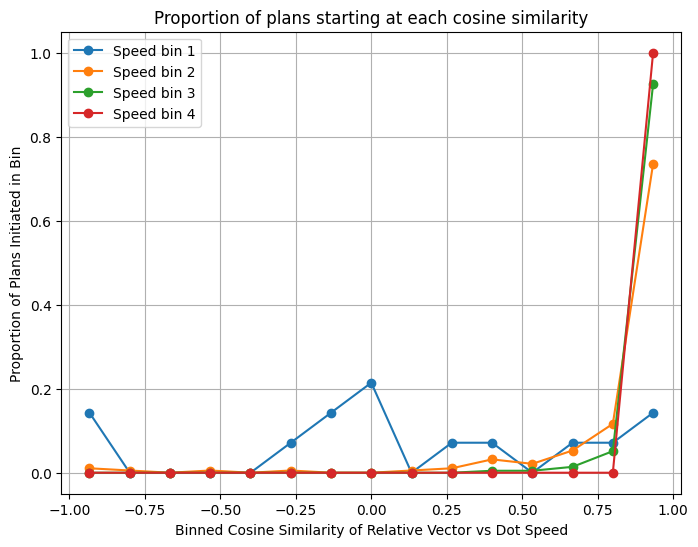

In [16]:
# prop plans at each cos sim, normalised by no plans in bin

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def calculate_cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    
    if norm_a == 0 or norm_b == 0:
        return 0
    return dot_product / (norm_a * norm_b)

# dont use mod_ values...
# dot_arr_mod = mod_(dot_arr)
# pos_arr_mod = mod_(pos_arr)
# pos_plan_arr_mod = mod_(pos_plan_arr)

sbins = 4
cbins = 15
cosine_bins = np.linspace(-1, 1, cbins+1)  # You can adjust the number of bins if needed

# Calculate dot speed
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)

plt.figure(figsize=(8, 6))

# For each speed bin, calculate the cosine similarities and plot their frequencies
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_samples = sample_arr[mask]
    masked_pos_plan = pos_plan_arr[mask]
    masked_dot = dot_arr[mask]
    
    x_sims = []
    
    for sample, pos_plan, dot in zip(masked_samples, masked_pos_plan, masked_dot):
        changes = np.diff(np.concatenate([[0], sample, [0]]))
        starts = np.where(changes == 1)[0]
        
        for start in starts:
            if start == 0:
                continue

            # Relative vector
            relative_vec = dot[start-1] - pos_plan[start-1]
            
            if np.linalg.norm(relative_vec) == 0:
                continue

            dot_vec = dot[start] - dot[start-1]
            
            if np.linalg.norm(dot_vec) == 0:
                continue

            x_sim = calculate_cosine_similarity(relative_vec, dot_vec)
            x_sims.append(x_sim)
    
    # Bin the x_sims and count the occurrences, then normalize
    binned_counts = []
    for bin_start, bin_end in zip(cosine_bins[:-1], cosine_bins[1:]):
        count_in_bin = sum(bin_start <= x < bin_end for x in x_sims)
        proportion_in_bin = count_in_bin / len(x_sims) if x_sims else 0
        binned_counts.append(((bin_start + bin_end) / 2, proportion_in_bin))

    bin_centers, proportions = zip(*binned_counts)
    plt.plot(bin_centers, proportions, label=f"Speed bin {i+1}", marker='o')

plt.xlabel('Binned Cosine Similarity of Relative Vector vs Dot Speed')
plt.ylabel('Proportion of Plans Initiated in Bin')
plt.title('Proportion of plans starting at each cosine similarity')
plt.legend()
plt.grid(True)
plt.show()


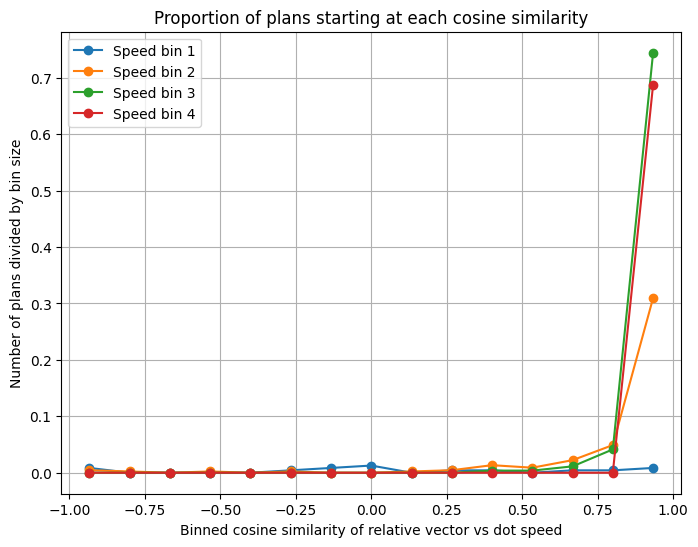

In [17]:
# prop plans at each cos sim, normalised by no trials in bin
# [(OLD); FIX - diff results for mod/not mod]

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def calculate_cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    
    if norm_a == 0 or norm_b == 0:
        return 0
    return dot_product / (norm_a * norm_b)

# dont use mod_ values...
# dot_arr_mod = mod_(dot_arr)
# pos_arr_mod = mod_(pos_arr)
# pos_plan_arr_mod = mod_(pos_plan_arr)

sbins = 4
cbins = 15
cosine_bins = np.linspace(-1, 1, cbins+1)  # You can adjust the number of bins if needed

# Calculate dot speed
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)

plt.figure(figsize=(8, 6))

# For each speed bin, calculate the cosine similarities and plot their frequencies
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_samples = sample_arr[mask]
    masked_pos_plan = pos_plan_arr[mask]
    masked_dot = dot_arr[mask]
    
    x_sims = []
    
    for sample, pos_plan, dot in zip(masked_samples, masked_pos_plan, masked_dot):
        changes = np.diff(np.concatenate([[0], sample, [0]]))
        starts = np.where(changes == 1)[0]
        
        for start in starts:
            if start == 0:
                continue

            # Relative vector
            relative_vec = dot[start-1] - pos_plan[start-1]
            
            if np.linalg.norm(relative_vec) == 0:
                continue

            dot_vec = dot[start] - dot[start-1]
            
            if np.linalg.norm(dot_vec) == 0:
                continue

            x_sim = calculate_cosine_similarity(relative_vec, dot_vec)
            x_sims.append(x_sim)
    
    total_in_speed_bin = len(masked_samples)
    
    # Bin the x_sims and count the occurrences, then normalize
    binned_counts = []
    for bin_start, bin_end in zip(cosine_bins[:-1], cosine_bins[1:]):
        count_in_bin = sum(bin_start <= x < bin_end for x in x_sims)
        proportion_in_bin = count_in_bin / total_in_speed_bin if total_in_speed_bin else 0
        binned_counts.append(((bin_start + bin_end) / 2, proportion_in_bin))

    bin_centers, proportions = zip(*binned_counts)
    plt.plot(bin_centers, proportions, label=f"Speed bin {i+1}", marker='o')

plt.xlabel('Binned cosine similarity of relative vector vs dot speed')
plt.ylabel('Number of plans divided by bin size')
plt.title('Proportion of plans starting at each cosine similarity')
plt.legend()
plt.grid(True)
plt.show()


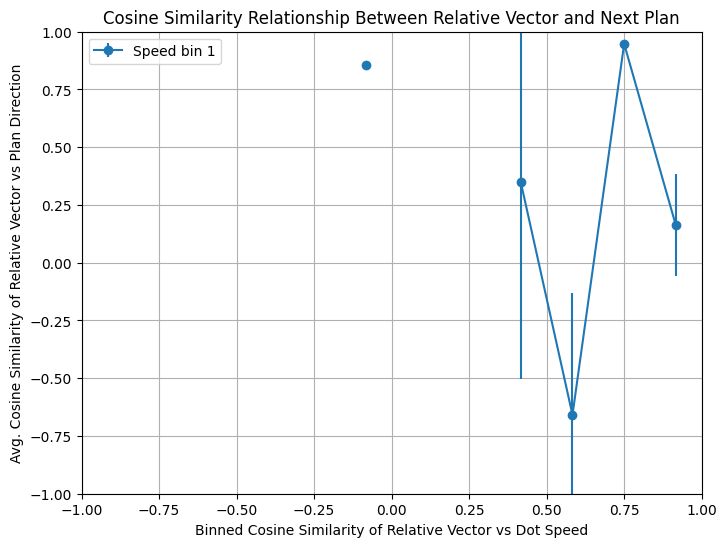

In [26]:
# cos sim of relative vec, and plan vec....
# FIX - only works with mod_() ?

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def calculate_cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    
    if norm_a == 0 or norm_b == 0:
        return 0
    return dot_product / (norm_a * norm_b)

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

sbins = 1 # 1
cbins = 12 # 15
cosine_bins = np.linspace(-1, 1, cbins+1)

dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)

plt.figure(figsize=(8, 6))

offset = 0.02  # Adjust this for the desired offset

for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    masked_samples = sample_arr[mask]
    masked_pos_plan = pos_plan_arr[mask]
    masked_dot = dot_arr[mask]
    
    x_sims = []
    y_sims = []
    
    for sample, pos_plan, dot in zip(masked_samples, masked_pos_plan, masked_dot):
        changes = np.diff(np.concatenate([[0], sample, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        
        for start, end in zip(starts, ends):
            if start == 0:
                continue

            relative_vec = dot[start-1] - pos_plan[start-1]
            
            if np.linalg.norm(relative_vec) == 0:
                continue

            dot_vec = dot[start] - dot[start-1]
            
            if np.linalg.norm(dot_vec) == 0:
                continue

            x_sim = calculate_cosine_similarity(relative_vec, dot_vec)
            plan_vector = pos_plan[end-1] - pos_plan[start-1]
            
            if np.linalg.norm(plan_vector) == 0:
                continue

            y_sim = calculate_cosine_similarity(relative_vec, plan_vector)
            x_sims.append(x_sim)
            y_sims.append(y_sim)

    binned_means_sem = []
    for bin_start, bin_end in zip(cosine_bins[:-1], cosine_bins[1:]):
        y_vals_in_bin = [y for x, y in zip(x_sims, y_sims) if bin_start <= x < bin_end]
        
        if len(y_vals_in_bin) > 1:
            bin_mean = np.mean(y_vals_in_bin)
            bin_sem = (1.96 * np.std(y_vals_in_bin)) / np.sqrt(len(y_vals_in_bin))
            binned_means_sem.append(((bin_start + bin_end) / 2, bin_mean, bin_sem))
        elif len(y_vals_in_bin) == 1:
            binned_means_sem.append(((bin_start + bin_end) / 2, y_vals_in_bin[0], 0))
        else:
            binned_means_sem.append(((bin_start + bin_end) / 2, np.nan, np.nan))
    
    bin_centers, means, sems = zip(*binned_means_sem)
    plt.errorbar(np.array(bin_centers) + i*offset, means, yerr=sems, label=f"Speed bin {i+1}", marker='o', linestyle='-')

plt.xlabel('Binned Cosine Similarity of Relative Vector vs Dot Velocity')
plt.ylabel('Avg. Cosine Similarity of Relative Vector vs Plan Direction')
plt.title('Cosine Similarity Relationship Between Relative Vector and Next Plan')
plt.legend()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.show()



bin size  0  =  4
bin size  1  =  29
bin size  2  =  10


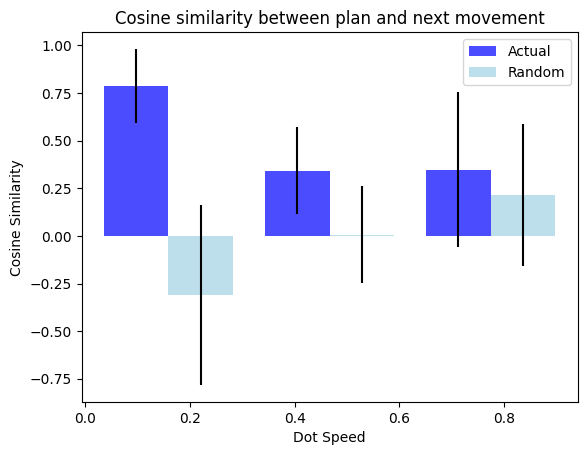

(-0.31129774671062826, 0.006988132786370866, 0.21543165017287952)


In [28]:
# cos sim between plan / next movement
## fix - use marginal dist of random vectors 

import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

PLAN_SPACE = np.pi/2
MODULES = 9
sbins = 3

x = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
y = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
xv,yv = np.meshgrid(x,y)
random_directions = np.vstack([xv.flatten(), yv.flatten()])

dot_arr_mod = mod_(dot_arr)
pos_arr_mod = mod_(pos_arr)
pos_plan_arr_mod = mod_(pos_plan_arr)

dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

cos_similarities = []
random_cos_similarities = []

for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_decisions = sample_arr[mask]
    masked_pos = pos_arr_mod[mask]
    masked_pos_plan = pos_plan_arr_mod[mask]
    
    similarities = []
    random_similarities = []
    
    for decision, pos, pos_plan in zip(masked_decisions, masked_pos, masked_pos_plan):
        changes = np.diff(np.concatenate([[0], decision, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        
        for start, end in zip(starts, ends):
            plan_traj = pos_plan[end - 1] - pos[start]
            
            if np.linalg.norm(plan_traj) == 0:
                continue
                
            norm_plan_traj = plan_traj / np.linalg.norm(plan_traj)
            
            if end < len(decision) - 1:
                move_dir = pos[end + 1] - pos[end]
                if np.linalg.norm(move_dir) == 0:
                    continue
                
                norm_move_dir = move_dir / np.linalg.norm(move_dir)
                cos_sim = np.dot(norm_plan_traj, norm_move_dir)
                similarities.append(cos_sim)

            random_move_dir = random_directions[:,np.random.choice(MODULES**2)]
            if np.linalg.norm(random_move_dir) == 0:
                continue
            norm_random_move_dir = random_move_dir / np.linalg.norm(random_move_dir)
            random_cos_sim = np.dot(norm_plan_traj, norm_random_move_dir)
            random_similarities.append(random_cos_sim)

    bin_size = len(similarities)
    print('bin size ',i,' = ',bin_size)
    sem_value = np.std(similarities) / np.sqrt(bin_size)

    cos_similarities.append((np.mean(similarities), sem_value))
    
    bin_size_random = len(random_similarities)
    random_sem_value = np.std(random_similarities) / np.sqrt(bin_size_random)
    
    random_cos_similarities.append((np.mean(random_similarities), random_sem_value))

means, sems = zip(*cos_similarities)
random_means, random_sems = zip(*random_cos_similarities)
bar_width = (speed_bins[1] - speed_bins[0]) * 0.4

plt.bar(speed_bin_centers - bar_width/2, means, yerr=1.96*np.array(sems), width=bar_width, label="Actual", color='blue', alpha=0.7)
plt.bar(speed_bin_centers + bar_width/2, random_means, yerr=1.96*np.array(random_sems), width=bar_width, label="Random", color = 'lightblue', alpha=0.8)
plt.xlabel('Dot Speed')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarity between plan and next movement')
plt.legend()
plt.show()

print(random_means)


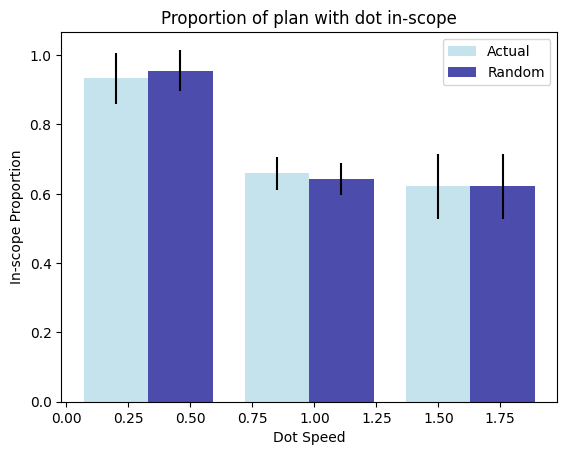

In [30]:
# % plan with dot in scope, vs random baseline
## use marginal dist of random vectors 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

# data
pos_arr_mod = mod_(pos_arr)
pos_plan_arr_mod = mod_(pos_plan_arr)
dot_arr_mod = mod_(dot_arr)

AP = np.pi/2
PLAN_SPACE = np.pi/2
MODULES = 9
sbins = 3

x = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
y = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
xv,yv = np.meshgrid(x,y)
random_directions = np.vstack([xv.flatten(), yv.flatten()])

# Calculate dot speeds
dot_diffs = np.diff(dot_arr_mod, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins+1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Result containers
in_scope_ratios = []
random_in_scope_ratios = []

for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_decisions = sample_arr[mask]
    masked_pos = pos_arr_mod[mask]
    masked_pos_plan = pos_plan_arr_mod[mask]
    masked_dot_positions = dot_arr_mod[mask]
    
    ratios = []
    random_ratios = []
    
    for decision, pos, pos_plan, dot_pos in zip(masked_decisions, masked_pos, masked_pos_plan, masked_dot_positions):
        # Find planning periods
        changes = np.diff(np.concatenate([[0], decision, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        
        for start, end in zip(starts, ends):
            # Handle actual movements
            in_scope_count = 0
            for t in range(start, end):
                if abs(dot_pos[t][0] - pos_plan[t][0]) <= AP or abs(dot_pos[t][1] - pos_plan[t][1]) <= AP:
                    in_scope_count += 1
            ratio = in_scope_count / (end - start)
            ratios.append(ratio)

            # Handle random movements
            random_start_pos = pos[start - 1] if start > 0 else pos[0]
            random_in_scope_count = 0
            for t in range(start, end):
                random_pos = random_start_pos + random_directions[:, np.random.randint(random_directions.shape[1])]
                if abs(dot_pos[t][0] - random_pos[0]) <= AP or abs(dot_pos[t][1] - random_pos[1]) <= AP:
                    random_in_scope_count += 1
            random_ratio = random_in_scope_count / (end - start)
            random_ratios.append(random_ratio)

    # Calculate means and SEM for actual and random in-scope ratios
    in_scope_ratios.append((np.mean(ratios), np.std(ratios) / np.sqrt(len(ratios))))
    random_in_scope_ratios.append((np.mean(random_ratios), np.std(random_ratios) / np.sqrt(len(random_ratios))))

# Plot
means, sems = zip(*in_scope_ratios)
random_means, random_sems = zip(*random_in_scope_ratios)
bar_width = (speed_bins[1] - speed_bins[0]) * 0.4

plt.bar(speed_bin_centers - bar_width/2, np.array(means), yerr=1.96*np.array(sems), width=bar_width, label='Actual', color='lightblue', alpha=0.7)
plt.bar(speed_bin_centers + bar_width/2, np.array(random_means), yerr=1.96*np.array(random_sems), width=bar_width, label='Random', color='darkblue', alpha=0.7)
# plt.axhline(y=np.mean(random_means), color='r', linestyle='--', label='Random Baseline')
plt.xlabel('Dot Speed')
plt.ylabel('In-scope Proportion')
plt.title('Proportion of plan with dot in-scope')
plt.legend()
plt.show()



means= [0.41251624, -0.07052246095261915, 0.30787292, 0.1407834565058988]


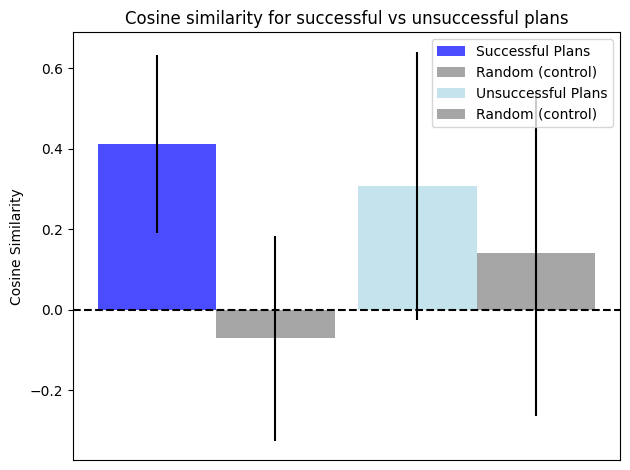

32
33
11
13


In [31]:
# cos sim between plan / move based on if dot was in scope of plan
## use marginal dist of random vectors 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

AP = np.pi/2
PLAN_SPACE = np.pi/2
MODULES = 9
x = np.linspace(-PLAN_SPACE, PLAN_SPACE, MODULES)
y = np.linspace(-PLAN_SPACE, PLAN_SPACE, MODULES)[::-1]
xv, yv = np.meshgrid(x, y)
random_directions = np.vstack([xv.flatten(), yv.flatten()])

pos_arr_mod = mod_(pos_arr)
pos_plan_arr_mod = mod_(pos_plan_arr)
dot_arr_mod = mod_(dot_arr)

cos_similarities = {
    "successful_actual": [],
    "successful_random": [],
    "unsuccessful_actual": [],
    "unsuccessful_random": []
}

for decision, pos, pos_plan, dot_pos in zip(sample_arr, pos_arr_mod, pos_plan_arr_mod, dot_arr_mod):
    changes = np.diff(np.concatenate([[0], decision, [0]]))
    starts = np.where(changes == 1)[0]
    ends = np.where(changes == -1)[0]
    
    for start, end in zip(starts, ends):
        plan_traj = pos_plan[end - 1] - pos[start]
        if np.linalg.norm(plan_traj) == 0:
            continue
                
        norm_plan_traj = plan_traj / np.linalg.norm(plan_traj)
        
        # Determine if plan was successful or unsuccessful
        in_scope = any([
            abs(dot_pos[t][0] - pos_plan[t][0]) <= AP or
            abs(dot_pos[t][1] - pos_plan[t][1]) <= AP
            for t in range(start, end)
        ])
        
        # For actual movement
        if end < len(decision) - 1:
            move_dir = pos[end + 1] - pos[end]
            if np.linalg.norm(move_dir) == 0:
                continue
                
            norm_move_dir = move_dir / np.linalg.norm(move_dir)
            cos_sim = np.dot(norm_plan_traj, norm_move_dir)

            # Categorize based on plan success
            if in_scope:
                cos_similarities["successful_actual"].append(cos_sim)
            else:
                cos_similarities["unsuccessful_actual"].append(cos_sim)

        # For random movement
        random_move_dir = random_directions[:,np.random.choice(MODULES**2)]
        if np.linalg.norm(random_move_dir) == 0:
            continue
                
        norm_random_move_dir = random_move_dir / np.linalg.norm(random_move_dir)
        random_cos_sim = np.dot(norm_plan_traj, norm_random_move_dir)
        
        # Categorize based on plan success
        if in_scope:
            cos_similarities["successful_random"].append(random_cos_sim)
        else:
            cos_similarities["unsuccessful_random"].append(random_cos_sim)

# Calculate means and SEMs for plotting
means = [np.mean(cos_similarities[key]) for key in cos_similarities]
sems = [np.std(cos_similarities[key]) / np.sqrt(len(cos_similarities[key])) for key in cos_similarities]

# Print means and their type
print('means=', means)

# Plot
labels = ["Successful Plans", "Random (control)", "Unsuccessful Plans", "Random (control)"]
bar_width = 1
positions = [1, 2, 3.2, 4.2]
bars = plt.bar(positions, means, yerr=1.96*np.array(sems), width=bar_width, color=['blue', 'gray', 'lightblue', 'gray'], alpha=0.7)
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.axhline(y=0, color='k', linestyle='--')
plt.xticks([])
plt.legend(loc="upper right")
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarity for successful vs unsuccessful plans')
plt.tight_layout()
plt.show()

# Print bin sizes
for key in cos_similarities:
    print(len(cos_similarities[key]))


In [ ]:
# means

/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3634: RuntimeWarning: divide by zero encountered in negative
  if np.any(np.less(err, -err, out=res, where=(err == err))):
/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3634: RuntimeWarning: divide by zero encountered in equal
  if np.any(np.less(err, -err, out=res, where=(err == err))):
/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3634: RuntimeWarning: divide by zero encountered in less
  if np.any(np.less(err, -err, out=res, where=(err == err))):
/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3642: RuntimeWarning: divide by zero encountered in multiply
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3642: RuntimeWarnin

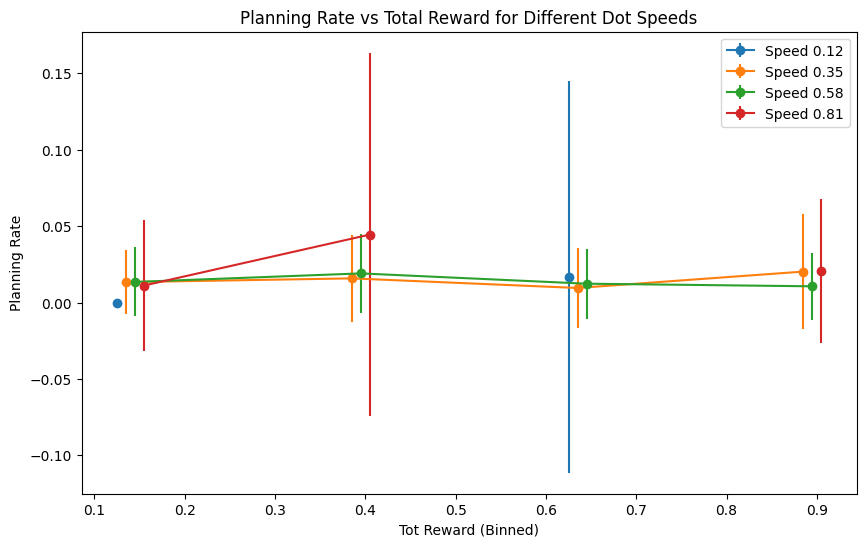

In [14]:
# plan rate vs tot reward, binned for dot speed

import numpy as np
import matplotlib.pyplot as plt

sbins = 4
rbins = 4

# dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# reward bins
reward_bins = np.linspace(0, 1, rbins + 1)
reward_bin_centers = (reward_bins[:-1] + reward_bins[1:]) / 2

plt.figure(figsize=(10, 6))

# speed bin
for s in range(len(speed_bins) - 1):
    mask_speed = (mean_dot_speeds >= speed_bins[s]) & (mean_dot_speeds < speed_bins[s + 1])
    
    planning_rates_per_speed = []
    planning_std_per_speed = []

    # reward bin
    for r in range(len(reward_bins) - 1):
        mask_reward = (np.sum(r_arr, axis=1) >= reward_bins[r]) & (np.sum(r_arr, axis=1) < reward_bins[r + 1])
        
        # decisions for both speed and reward conditions
        masked_decisions = sample_arr[mask_speed & mask_reward]
        
        # planning rate for this bin
        rate = np.mean(masked_decisions)
        planning_rates_per_speed.append(rate)
        planning_std_per_speed.append(np.std(masked_decisions)/np.sqrt(len(masked_decisions)))

    plt.errorbar(reward_bin_centers + s*0.01, planning_rates_per_speed, yerr=planning_std_per_speed, linestyle='-', marker='o', label=f"Speed {speed_bin_centers[s]:.2f}")

plt.xlabel('Tot Reward (Binned)')
plt.ylabel('Planning Rate')
plt.title('Planning Rate vs Total Reward for Different Dot Speeds')
plt.legend()
plt.show()


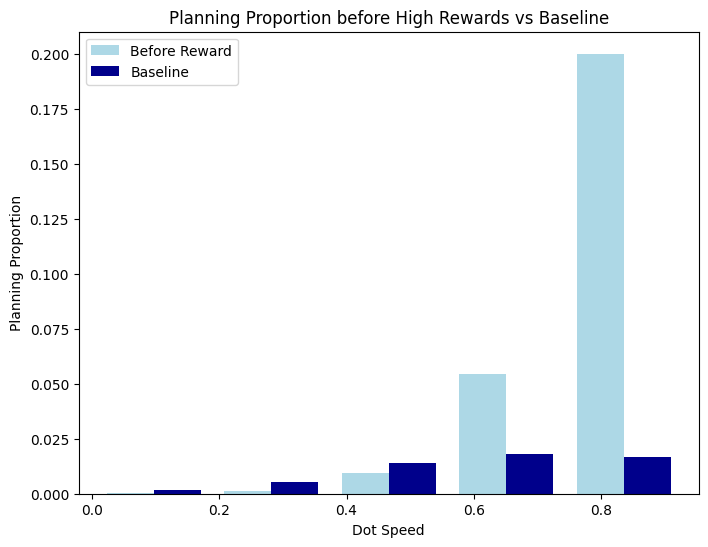

In [13]:
# plan rate before high reward

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Constants (adjustable)
PREVIOUS_STEPS = 5
REWARD_THRESHOLD = 0.7
sbins = 5

# Calculate dot speeds (assuming you have dot_positions as before)
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Result containers
plan_ratios = []
baseline_ratios = []

# For each speed bin
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    masked_decisions = sample_arr[mask]
    masked_rewards = r_arr[mask]

    all_plans_before_rewards = []
    for trial_num, (decision, rewards) in enumerate(zip(masked_decisions, masked_rewards)):
        high_reward_indices = np.where(rewards > REWARD_THRESHOLD)[0]
        
        if len(high_reward_indices) == 0:
            # print(f"{trial_num} has no rewards")
            continue

        planning_periods_before_rewards = []
        for idx in high_reward_indices:
            start_idx = max(0, idx-PREVIOUS_STEPS)
            if start_idx >= idx:
                # print(f"Insufficient steps before high reward at index {idx} in trial {trial_num}.")
                continue

            planning_rate = np.mean(decision[start_idx:idx])
            planning_periods_before_rewards.append(planning_rate)

        if not planning_periods_before_rewards:
            # print(f"Trial {trial_num} had high rewards but no valid planning rates were calculated.")
            continue

        all_plans_before_rewards.extend(planning_periods_before_rewards)


    plan_ratios.append(np.mean(all_plans_before_rewards))
    # print('pr=',plan_ratios)
    baseline_ratios.append(np.mean(masked_decisions))

# Plot
bar_width = (speed_bins[1] - speed_bins[0]) * 0.4
plt.figure(figsize=(8, 6))
plt.bar(speed_bin_centers - bar_width/2, plan_ratios, width=bar_width, label="Before Reward", color="lightblue")
plt.bar(speed_bin_centers + bar_width/2, baseline_ratios, width=bar_width, label="Baseline", color="darkblue")
plt.xlabel('Dot Speed')
plt.ylabel('Planning Proportion')
plt.title('Planning Proportion before High Rewards vs Baseline')
plt.legend()
plt.show()


In [ ]:
# load arrs, pgv2/3/4 (OLD)
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np

np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_data(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

def freeze_array(BA, P):
    P2 = np.zeros_like(P)
    P2[:, 0] = P[:, 0]
    for t in range(1, P.shape[1]):
        if BA[t] == 0:
            P2[:, t] = P[:, t]  # Update to current value in P
        else:
            P2[:, t] = P2[:, t - 1]  # Hold previous value
    return P2

def compare_arrays(pos_arr, pos_plan_arr):
    return np.where(pos_arr == pos_plan_arr, 0, 1)


file_ = 'outer_loop_pg_new_v4_26_09-022146.pkl' # 'outer_loop_pg_new_v4f_13_10-081756.pkl' # 'outer_loop_pg_new_v4f_12_10-080400.pkl' # 'outer_loop_pg_new_v4f_12_10-204349.pkl' # 'outer_loop_pg_new_v4f_12_10-084905.pkl' # 'outer_loop_pg_new_v4f_12_10-175620.pkl' #'outer_loop_pg_new_v4f_12_10-173828.pkl' #'outer_loop_pg_new_v4f_12_10-151505.pkl' # 'outer_loop_pg_new_v4f_12_10-084905.pkl' # 'outer_loop_pg_new_v4f_12_10-080400.pkl' # 'outer_loop_pg_new_v4_26_09-022146.pkl' # 'outer_loop_pg_new_v4_24_09-201550.pkl' # 'outer_loop_pg_new_v4_18_09-093520.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'outer_loop_pg_new_v4_ppo_new__19_09-172733.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'sc_project/test_data/outer_loop_pg_new_v4_ppo_new__19_09-172733.pkl' # 'outer_loop_pg_new_v4_17_09-200259.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'outer_loop_pg_new_v3_c__15_09-203653.pkl'
# (other,weights_s) = load_data(file_) # # [VMAPS,STEPS,N]x2,[VMAPS,STEPS,2]x3,[VMAPS,STEPS]x2
other = load_data(file_)
(r_arr,rt_arr,sample_arr,pos_plan_arr,pos_arr,dot_arr) = other # (r_arr,rt_arr,sample_arr,pos_plan_arr,pos_arr,dot_arr) (r_arr,rt_arr,pos_arr,dot_arr)
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr) = other
# sample_arr = compare_arrays(pos_arr, pos_plan_arr)
# print('r_arr.shape=',r_arr.shape,'rt_arr.shape=',rt_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'sample_arr.shape=',sample_arr.shape)
print('r_arr.shape=',r_arr.shape,'rp_arr.shape=',rp_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'sample_arr.shape=',sample_arr.shape)
# pos_plan_arr, pos_arr, dot_arr = pos_plan_arr[:,1:,:], pos_arr[:,1:,:], dot_arr[:,1:,:]

/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3634: RuntimeWarning: divide by zero encountered in negative
  if np.any(np.less(err, -err, out=res, where=(err == err))):
/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3634: RuntimeWarning: divide by zero encountered in equal
  if np.any(np.less(err, -err, out=res, where=(err == err))):
/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3634: RuntimeWarning: divide by zero encountered in less
  if np.any(np.less(err, -err, out=res, where=(err == err))):
/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3642: RuntimeWarning: divide by zero encountered in multiply
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


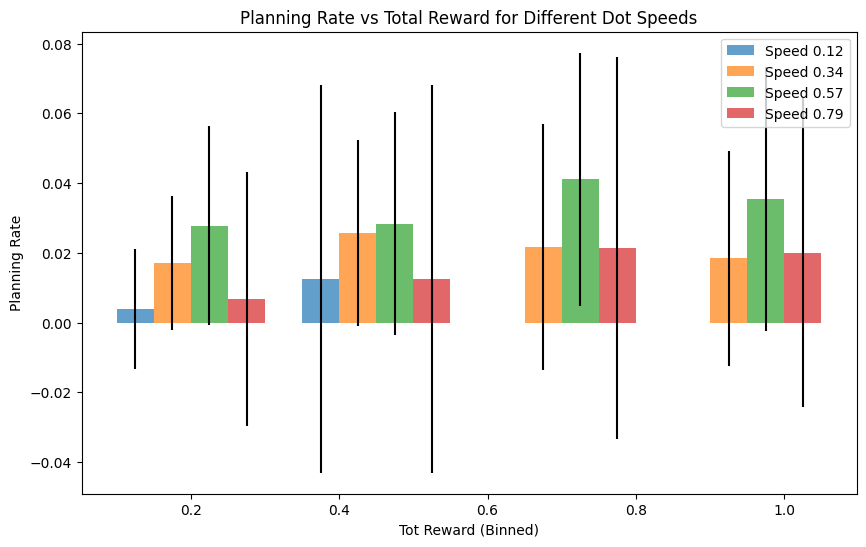

In [73]:
# plan rate vs tot reward binned for dot speed (OLD)

import numpy as np
import matplotlib.pyplot as plt

sbins = 4
rbins = 4

# dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# reward bins
reward_bins = np.linspace(0, 1, rbins + 1)
reward_bin_centers = (reward_bins[:-1] + reward_bins[1:]) / 2

plt.figure(figsize=(10, 6))
bar_width = (reward_bins[1] - reward_bins[0]) * 0.2

# speed bin
for s in range(len(speed_bins) - 1):
    mask_speed = (mean_dot_speeds >= speed_bins[s]) & (mean_dot_speeds < speed_bins[s + 1])
    
    planning_rates_per_speed = []
    planning_std_per_speed = []

    # reward bin
    for r in range(len(reward_bins) - 1):
        mask_reward = (np.sum(r_arr, axis=1) >= reward_bins[r]) & (np.sum(r_arr, axis=1) < reward_bins[r + 1])
        
        # decisions for both speed and reward conditions
        masked_decisions = sample_arr[mask_speed & mask_reward]
        
        # planning rate for this bin
        rate = np.mean(masked_decisions)
        planning_rates_per_speed.append(rate)
        planning_std_per_speed.append(np.std(masked_decisions)/np.sqrt(len(masked_decisions)))

    bar_positions = reward_bin_centers + s*bar_width
    plt.bar(bar_positions, planning_rates_per_speed, yerr=planning_std_per_speed, width=bar_width, label=f"Speed {speed_bin_centers[s]:.2f}", alpha=0.7)

plt.xlabel('Tot Reward (Binned)')
plt.ylabel('Planning Rate')
plt.title('Planning Rate vs Total Reward for Different Dot Speeds')
plt.legend()
# plt.xticks([])  # This will remove x ticks
plt.show()


In [ ]:
# v2/3, norm of pos_arr and pos_plan_arr:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot timeseries, v3
print('sample_arr.shape=',sample_arr.shape)
print('pos_arr.shape=',pos_arr.shape)
print('pos_plan_arr.shape=',pos_plan_arr.shape)

k = 0
binary_array = sample_arr[k,:] # .T, -1
binary_array = jnp.concatenate([jnp.zeros((1,)),binary_array],axis=0)

# Calculate the norms
norm_pos_arr = jnp.linalg.norm(pos_arr[k,:,:], axis=1) # .T
norm_pos_plan_arr = jnp.linalg.norm(pos_plan_arr[k,:,:], axis=1) # .T

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting norms
plt.plot(norm_pos_arr, label="Norm of pos_arr", color='blue')
plt.plot(norm_pos_plan_arr, label="Norm of pos_plan_arr", color='green')

# Plotting binary time series
plt.plot(binary_array * norm_pos_arr.max(), label="Binary time series (scaled)", color='red', linestyle='--')

# Additional plot settings
plt.title(f"Norm of pos_arr and pos_plan_arr, switch_prob={'0.2'}, max_plan_length={''}", fontsize=14)
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# cos sim plan/next move (OLD)

import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

# Sample Data
dot_arr_mod = mod_(dot_arr) #np.random.rand(1000, 121, 2)
pos_arr_mod = mod_(pos_arr)
pos_plan_arr_mod = mod_(pos_plan_arr)

# Calculate dot speeds
dot_diffs = np.diff(dot_positions, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=6)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Result containers
cos_similarities = []

# For each speed bin
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_decisions = sample_arr[mask]
    masked_pos = pos_arr_mod[mask]
    masked_pos_plan = pos_plan_arr_mod[mask]
    
    similarities = []
    
    # For each trial in the bin
    for decision, pos, pos_plan in zip(masked_decisions, masked_pos, masked_pos_plan):
        # Find the planning periods
        changes = np.diff(np.concatenate([[0], decision, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        
        for start, end in zip(starts, ends):
            plan_traj = pos_plan[end - 1] - pos[start]
            
            if np.linalg.norm(plan_traj) == 0:
                continue  # skip if plan_traj is a zero vector, to avoid /0
                
            norm_plan_traj = plan_traj / np.linalg.norm(plan_traj)
            
            if end < len(decision) - 1:  # check if there's a next timestep
                move_dir = pos[end + 1] - pos[end]
                if np.linalg.norm(move_dir) == 0:
                    continue  # skip if move_dir is a zero vector, to avoid /0
                            
                norm_move_dir = move_dir / np.linalg.norm(move_dir)
                cos_sim = np.dot(norm_plan_traj, norm_move_dir)
                similarities.append(cos_sim)
                
    if similarities:  # If there are any valid similarities
        cos_similarities.append((np.mean(similarities), np.std(similarities)))
    else:
        cos_similarities.append((np.nan, np.nan))  # default value if no valid similarities in the bin
        
# Plot
means, stds = zip(*cos_similarities)
bar_width = (speed_bins[1] - speed_bins[0]) * 0.4

plt.bar(speed_bin_centers, means, yerr=stds, width=bar_width)
plt.axhline(y=0, color='r', linestyle='--')  # Replace 0 with your baseline value
plt.xlabel('Dot Speed')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity between plan and next move')
plt.show()


In [ ]:
# % in scope (old)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

# Data
pos_plan_arr_mod = mod_(pos_plan_arr)
dot_arr_mod = mod_(dot_arr)
AP = np.pi/2

# Calculate dot speeds
dot_diffs = np.diff(dot_arr_mod, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=6)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Result containers
in_scope_ratios = []

# For each speed bin
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_decisions = sample_arr[mask]
    masked_dot = dot_arr_mod[mask] #pos_arr[mask]
    masked_pos_plan = pos_plan_arr_mod[mask]
    
    ratios = []
    
    # For each trial in the bin
    for decision, dot, plan_pos in zip(masked_decisions, masked_dot, masked_pos_plan):
        # Find the planning periods
        changes = np.diff(np.concatenate([[0], decision, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        # print('decision=',decision,'dot_pos=',dot_pos,'plan_pos=',plan_pos)
        # print('changes=',changes,'starts=',starts,'ends=',ends)
        
        for start, end in zip(starts, ends):
            in_scope_count = 0
            for t in range(start, end):
                # Check if dot is "in scope"
                horizontal_dist = np.abs(dot[t][0] - plan_pos[t][0])
                vertical_dist = np.abs(dot[t][1] - plan_pos[t][1])
                print('dot=',dot[t],'plan_pos=',plan_pos[t])
                
                if horizontal_dist <= AP or vertical_dist <= AP:
                    # print('yes')
                    in_scope_count += 1

            
            ratio = in_scope_count / (end - start)
            ratios.append(ratio)
                
    in_scope_ratios.append((np.mean(ratios), np.std(ratios)))

# Plot
means, stds = zip(*in_scope_ratios)
plt.bar(speed_bin_centers, means, yerr=stds, width=speed_bins[1] - speed_bins[0])
plt.xlabel('Dot Speed')
plt.ylabel('Proportion In-Scope')
plt.title('Proportion of plan with dot in-scope')
plt.show()

print('means=',means)

In [ ]:
# v1 (no plan)

In [ ]:
# load arrs, pgv1
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np

np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_data(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

def freeze_array(BA, P):
    P2 = np.zeros_like(P)
    P2[:, 0] = P[:, 0]
    for t in range(1, P.shape[1]):
        if BA[t] == 0:
            P2[:, t] = P[:, t]  # Update to current value in P
        else:
            P2[:, t] = P2[:, t - 1]  # Hold previous value
    return P2

# file_ = 'outer_loop_pg_new_v1_ppo__10_09-072009.pkl'

file_ = 'outer_loop_pg_new_v1_ppo_c_init__15_09-082206.pkl' # 'outer_loop_pg_new_v3__11_09-200631.pkl' # 'outer_loop_pg_new_v1__27_08-15_S39.pkl'
# (other,weights_s) = load_data(file_) # # [VMAPS,STEPS,N]x2,[VMAPS,STEPS,2]x3,[VMAPS,STEPS]x2
other = load_data(file_)
(r_arr,rt_arr,pos_arr,dot_arr) = other ##sample_arr (r_arr,rt_arr,pos_arr,dot_arr)
print('r_arr.shape=',r_arr.shape,'rt_arr.shape=',rt_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'dot_arr.shape=',dot_arr.shape) #,'sample_arr.shape=',sample_arr.shape)
# print('weights_s["Us_f"].shape=',weights_s["Us_f"].shape)

# pos_arr = np.zeros_like(pos_plan_arr)
# for i in range(pos_plan_arr.shape[0]):
#     pos_arr[i,:,:] = freeze_array(sample_arr[i,:].T,pos_plan_arr[i,:,:]) # pm_arr[]
# print('pos_arr.shape=',pos_arr.shape)

print('pos_arr=',pos_arr[0,:,:])

In [ ]:
# sort arrs, pgv1/2/3
tot_reward = jnp.sum(r_arr, axis=1)
r_tot_desc = jnp.argsort(tot_reward)[::-1]
r_tot_asc = jnp.argsort(tot_reward) #[::-1]
# tot_loss_v = jnp.sum(loss_v_arr_, axis=1)
# loss_v_asc = jnp.argsort(tot_loss_v) #[::-1]
# loss_v_desc = jnp.argsort(tot_loss_v)[::-1]
# tot_loss_d = jnp.sum(loss_d_arr_, axis=1)
# loss_d_asc = jnp.argsort(tot_loss_d) #[::-1]
print('r_tot_desc=',r_tot_desc[:10])
print('r_tot_asc=',r_tot_asc[:10])
# print('loss_v_asc=',loss_v_asc[:10])
# print('loss_v_desc=',loss_v_desc[:10])
# print('loss_d_asc=',loss_d_asc[:10])

In [ ]:
avg_noplan_rewards = [13.62,3.05,0.93,0.72]
std_noplan_rewards = [7.33,4.76,1.77,1.33]
avg_noplan_rewards = np.array(avg_noplan_rewards)
std_noplan_rewards = np.array(std_noplan_rewards)
avg_shuffle_rewards = [10.50,1.05,0.49,0.43]
std_shuffle_rewards = [13.55,4.77,1.12,0.75]
avg_shuffle_rewards = np.array(avg_shuffle_rewards)
std_shuffle_rewards = np.array(std_shuffle_rewards)


In [ ]:
# full ani pgv1 wip
%matplotlib qt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
import functools
from matplotlib.patches import Ellipse

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

def gen_vectors(m, A): # modules/neurons, aperture
    x = np.linspace(-(A-A/m), (A-A/m), m)
    x_ = np.tile(x, (m, ))
    y_ = np.repeat(np.flip(x), m)
    return np.vstack([x_, y_])

def circ_mean_var(v_pred,vec_range):
    v_clamped = np.clip(v_pred,0,None)
    # get x/y coords
    x_y_coords = gen_vectors(np.int32(np.sqrt(len(v_clamped))),vec_range)
    x = x_y_coords[0,:]
    y = x_y_coords[1,:]
    # weighted complex numbers
    z_x = v_pred*(np.cos(x) + 1j*np.sin(x))
    z_y = v_pred*(np.cos(y) + 1j*np.sin(y))
    # mean
    mean_x = np.angle(np.sum(z_x)/np.sum(v_clamped))
    mean_y = np.angle(np.sum(z_y)/np.sum(v_clamped))
    # weighted circular variance for each angle
    circular_var_x = 1 - np.abs(np.sum(z_x) / np.sum(v_clamped))
    circular_var_y = 1 - np.abs(np.sum(z_y) / np.sum(v_clamped))
    circular_cov_matrix = np.diag([circular_var_x, circular_var_y])
    eigvals,eigvecs = np.linalg.eigh(circular_cov_matrix)
    sigma_x,sigma_y = np.sqrt(eigvals)  # no Scale factor for visualization
    return x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y

def set_axis_properties(ax,lim,labels,title=''):
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal', 'box')  
    ax.set_title(title)
    ticks = np.linspace(-lim,lim,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

def get_aperture_points(agent_t,aperture,density):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot,y_tot

def is_point_in_ellipse(x,y,h,k,a,b):
    ellipse_eq = ((x - h)**2)/(a ** 2) + ((y - k)**2)/(b**2)
    return ellipse_eq <= 1

def vonmises_fit(x_coords,y_coords,v_pred_vec):
    # v_pred_vec = np.clip(v_pred_vec,0,None)
    # v_pred_norm = v_pred_vec/np.sum(v_pred_vec)
    scalar = 100
    kappa_max = 2
    integer_weights = np.int32(np.round(v_pred_vec*scalar))
    x_samples = np.repeat(x_coords, integer_weights)
    y_samples = np.repeat(y_coords, integer_weights)
    kappa_x,loc_x,_ = scipy.stats.vonmises.fit(x_samples)
    kappa_y,loc_y,_ = scipy.stats.vonmises.fit(y_samples)
    kappa_x = np.min([kappa_x,kappa_max])
    kappa_y = np.min([kappa_y,kappa_max])
    # mean_magnitude = (np.exp(kappa_x+kappa_y)/((2*np.pi)**2 * scipy.special.i0(kappa_x) * scipy.special.i0(kappa_y)))
    log_numerator = kappa_x + kappa_y
    log_denominator = 2 * np.log(2*np.pi) + np.log(scipy.special.i0(kappa_x)) + np.log(scipy.special.i0(kappa_y))
    log_result = log_numerator - log_denominator
    mean_magnitude = np.exp(log_result)
    return kappa_x,loc_x,kappa_y,loc_y,mean_magnitude

def animate(i,r_arr,dot_arr,pos_arr,dot,agent,aperture_points,act_space_points,plan_space_points,L):
    dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
    agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))
    # dot_hat.set_data(mod_(dot_hat_arr[i, 0]), mod_(dot_hat_arr[i, 1]))

    if i == 0:
        aperture_points.set_color('green')
    else:
        aperture_points.set_color('black')

    # x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y = circ_mean_var(v_pred_arr[i],np.pi)### think
    # x_y_coords,x,y,mean_x_ap,mean_y_ap,sigma_x_ap,sigma_y_ap = circ_mean_var(v_pred_arr[i],np.pi)### think
    # scale = APERTURE/jnp.pi
    # ell_circular.set_center((mod_(mean_x+pos_arr[i, 0]), mod_(mean_y+pos_arr[i, 1])))
    # ell_circular.width = SIGMA_SCALE*sigma_x
    # ell_circular.height = SIGMA_SCALE*sigma_y
    # ell_circular_v_pred.set_center((mean_x, mean_y))
    # ell_circular_v_pred.width = SIGMA_SCALE*sigma_x
    # ell_circular_v_pred.height = SIGMA_SCALE*sigma_y
    # ell_circular_v_t.set_center((mean_x, mean_y))
    # ell_circular_v_t.width = SIGMA_SCALE*sigma_x
    # ell_circular_v_t.height = SIGMA_SCALE*sigma_y
    # if i>0:
        # in_ell_array[i] = is_point_in_ellipse(mod_(mean_x+pos_arr[i, 0]), mod_(mean_y+pos_arr[i, 1]), mod_(dot_arr[i,0]), mod_(dot_arr[i,1]), SIGMA_SCALE*sigma_x, SIGMA_SCALE*sigma_y)
        # kappa_x,loc_x,kappa_y,loc_y,mean_magnitude = vonmises_fit(x_y_coords[0,:],x_y_coords[1,:],v_pred_arr[i])
        # text_ani.set_label(f'Frame {i}/{STEPS}, reward={mean_magnitude:.3f}')    
        # ax_ani.get_legend().remove()
        # ax_ani.legend(loc='right') #, bbox_to_anchor=(1, 1))
        # text_ani.set_text(f'vm_fit_mean={mean_magnitude}') # mod_(loc_x+pos_arr[i, 0])},{mod_(loc_y+pos_arr[i, 1])
        # print('i=',i,'mean_ell=',mod_(mean_x+pos_arr[i, 0]),mod_(mean_y+pos_arr[i, 1]),'mean_vm=',mod_(loc_x+pos_arr[i, 0]),mod_(loc_y+pos_arr[i, 1]),'mean_magnitude_vm=',mean_magnitude)
    lab = f'Frame={i}, Reward={r_arr[i]:.3f}' #, k={kappa_x:.3f},{kappa_y:.3f}'
    L.get_texts()[0].set_text(lab)

    # print('pos=',pos_arr[i,:],'mean=',mean_x,mean_y,'sigma=',sigma_x,sigma_y,'in_ell=',in_ell_array[i])

    # scatters_pred.set_offsets(neuron_locs.T)
    # scatters_pred.set_array(v_pred_arr[i])
    # scatters_pred.set_sizes(15 * np.sqrt(v_pred_arr[i])) # []
    # scatters_pred.set_facecolors('k')

    # scatters_t.set_offsets(neuron_locs.T)
    # scatters_t.set_array(v_t_arr[i])
    # scatters_t.set_sizes(15 * np.sqrt(v_t_arr[i])) # []
    # scatters_t.set_facecolors('k')
    x_aperture,y_aperture = get_aperture_points(pos_arr[i],APERTURE,DENSITY_DEFAULT)
    x_aperture_centre,y_aperture_centre = get_aperture_points(np.array([0,0]),APERTURE,DENSITY_DEFAULT)
    aperture_points.set_offsets(np.c_[mod_(x_aperture), mod_(y_aperture)])
    # aperture_points_v_pred.set_offsets(np.c_[mod_(x_aperture_centre), mod_(y_aperture_centre)])
    # aperture_points_v_t.set_offsets(np.c_[mod_(x_aperture_centre), mod_(y_aperture_centre)])
    x_act_space,y_act_space = get_aperture_points(pos_arr[i],ACTION_SPACE,DENSITY_DEFAULT)
    act_space_points.set_offsets(np.c_[mod_(x_act_space), mod_(y_act_space)])
    x_plan_space,y_plan_space = get_aperture_points(pos_arr[i],PLAN_SPACE,DENSITY_PLAN_SPACE)
    plan_space_points.set_offsets(np.c_[mod_(x_plan_space), mod_(y_plan_space)])
    
    return [dot,agent,aperture_points,act_space_points,plan_space_points,L]

k = 1022 # 0,202, 275
interval = 300
APERTURE = (1/2)*np.pi # (3/5)*np.pi # (1/2)*np.pi # (np.sqrt(2)/2)*np.pi # np.pi/2
ACTION_FRAC = 1/2 
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 2 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2
STEPS = pos_arr.shape[1]
MODULES = 7 # 7 # 9 # 17 # 15
# NEURONS_DISP = np.int32(np.sqrt(v_pred_arr.shape[2])) ##14 # 16 # 15 # 15 # 12 # 6 # ''full'' np.int32(NEURONS_AP*(np.pi//APERTURE))
SIGMA_SCALE = 3

DENSITY_DEFAULT = 1000
DENSITY_PLAN_SPACE = 10

# neuron_locs = gen_vectors(NEURONS_DISP,jnp.pi) # NEURONS
# v_pred_arr_ = np.clip(v_pred_arr[k,:,:],0,1)
# v_t_arr_ = v_t_arr[k,:,:]
r_arr_ = r_arr[k,:]
dot_arr_ = dot_arr[k,:,:] # [STEPS,2]
pos_arr_ = pos_arr[k,:,:] # [STEPS,2]
# rel_vec_hat_arr_ = rel_vec_hat_arr[k,:,:] # [STEPS,2]
# dot_hat_arr_ = mod_(rel_vec_hat_arr_ + pos_arr_)

fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

ax_ani = plt.subplot(gs[0:2, 0:2],aspect='equal')
set_axis_properties(ax_ani,jnp.pi,["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
agent, = ax_ani.plot(mod_(pos_arr_[0, 0]), mod_(pos_arr_[0, 1]), 'k+', markersize=12) #, label='agent')
dot, = ax_ani.plot(mod_(dot_arr_[0, 0]), mod_(dot_arr_[0, 1]), 'rx', markersize=10) #, label='dot')
text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')
# dot_hat, = ax_ani.plot(mod_(dot_hat_arr_[0, 0]), mod_(dot_hat_arr_[0, 1]), 'bx', markersize=10, label='dot_hat')

aperture_points = ax_ani.scatter([], [], color='black', s=1)
act_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)
plan_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)

# ell_circular = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ell_circular_patch = ax_ani.add_patch(ell_circular)
# text_ani = ax_ani.text(0.5, 0.8, '', transform=ax_ani.transAxes)
# ax_ani.legend(loc='upper left', bbox_to_anchor=(1, 1))
# ax_ani.legend(loc='upper right')
L=ax_ani.legend(loc='upper right')

# in_ell_array = np.zeros(STEPS,)

# ax_pred = plt.subplot(gs[2, 0], aspect='equal')
# # update scatter
# scatters_pred = ax_pred.scatter(
#     neuron_locs[0, :], neuron_locs[1, :], 
#     c='k', # v_pred_arr_[0], 
#     s=15 * np.sqrt(v_pred_arr_[0]), 
#     marker='o',
#     vmin=0, vmax=1)
# aperture_points_v_pred = ax_pred.scatter([], [], color='black', s=0.5)
# ell_circular_v_pred = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ecp_v_pred = ax_pred.add_patch(ell_circular_v_pred)
# set_axis_properties(ax_pred, jnp.pi, ["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"], 'v_pred')

# ax_t = plt.subplot(gs[2, 1], aspect='equal')
# # update scatter
# scatters_t = ax_t.scatter(
#     neuron_locs[0, :], neuron_locs[1, :], 
#     c='k', # v_t_arr_[0], 
#     s=15 * np.sqrt(v_t_arr_[0]), 
#     marker='o',
#     vmin=0, vmax=1)  # Assuming activations range from 0 to 1
# aperture_points_v_t = ax_t.scatter([], [], color='black', s=0.5)
# ell_circular_v_t = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ecp_v_t = ax_t.add_patch(ell_circular_v_t)
# set_axis_properties(ax_t, jnp.pi, ["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"], 'v_t')

partial_animate = functools.partial(
    animate,
    # v_pred_arr=v_pred_arr_, 
    # v_t_arr=v_t_arr_, 
    r_arr=r_arr_,
    dot_arr=dot_arr_, 
    # dot_hat_arr=dot_hat_arr_,
    pos_arr=pos_arr_, 
    dot=dot, 
    # dot_hat=dot_hat,
    agent=agent, 
    # neuron_locs=neuron_locs, 
    # scatters_pred=scatters_pred, 
    # scatters_t=scatters_t,
    aperture_points=aperture_points,
    # aperture_points_v_pred=aperture_points_v_pred,
    # aperture_points_v_t=aperture_points_v_t,
    act_space_points=act_space_points,
    plan_space_points=plan_space_points,
    # ell_circular=ell_circular,
    # ell_circular_v_pred=ell_circular_v_pred,
    # ell_circular_v_t=ell_circular_v_t,
    # in_ell_array=in_ell_array,
    # text_ani=text_ani,
    # ax_ani=ax_ani,
    L=L,
    )

ani = animation.FuncAnimation(
    fig=fig, 
    func=partial_animate,
    frames=STEPS, 
    blit=True, 
    interval=interval
    )

plt.tight_layout()
plt.show()

# print('in_ell_array=',in_ell_array[1:])
# print(r'% in array = ',np.sum(in_ell_array[1:])/(STEPS-1))